
# EDA PROJECT
## Topic - Import and Export of India
### Members - Shivani Pande (202218044), Swapnil Sheth (202218045), Vipul Singh (202218052), Bakshi Jitul (202218059)



### 1) First type of dataset - India's Import and Export of Fuel with Partner Countries

### Importing Important Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse

In [5]:
import warnings                       # To hide the compilation process warnings
warnings.filterwarnings("ignore")

### Reading all the csv files for first type of dataset

In [6]:
y12= pd.read_csv('/content/Fuel_2012.csv')    # Import-Export Fuel dataset of 2012
y13= pd.read_csv('/content/Fuel_2013.csv')    # Import-Export Fuel dataset of 2013
y14= pd.read_csv('/content/Fuel_2014.csv')    # Import-Export Fuel dataset of 2014
y15= pd.read_csv('/content/Fuel_2015.csv')    # Import-Export Fuel dataset of 2015
y16= pd.read_csv('/content/Fuel_2016.csv')    # Import-Export Fuel dataset of 2016
y17= pd.read_csv('/content/Fuel_2017.csv')    # Import-Export Fuel dataset of 2017

### Data Preprocessing and Data Cleaning

In [7]:
# Filtering out unnecessary columns by picking only significant columns in all dataframes 

y12= y12[['Partner Name','Export (US$ Thousand)','Import (US$ Thousand)','Export Product Share (%)','Import Product Share (%)']]
y13= y13[['Partner Name','Export (US$ Thousand)','Import (US$ Thousand)','Export Product Share (%)','Import Product Share (%)']]
y14= y14[['Partner Name','Export (US$ Thousand)','Import (US$ Thousand)','Export Product Share (%)','Import Product Share (%)']]
y15= y15[['Partner Name','Export (US$ Thousand)','Import (US$ Thousand)','Export Product Share (%)','Import Product Share (%)']]
y16= y16[['Partner Name','Export (US$ Thousand)','Import (US$ Thousand)','Export Product Share (%)','Import Product Share (%)']]
y17= y17[['Partner Name','Export (US$ Thousand)','Import (US$ Thousand)','Export Product Share (%)','Import Product Share (%)']]

In [8]:
# Some of the values in the column contains comma ',' ; e.g. 1,000 
# This function remove commas from the values of each column and convert the column into numeric datatype in each dataframe

def remove_comma(df):
    for i in range(len(df['Export (US$ Thousand)'])):
        if type(df['Export (US$ Thousand)'][i])==str:
            df['Export (US$ Thousand)'][i]=float(df['Export (US$ Thousand)'][i].replace(',', ''))

    df['Export (US$ Thousand)']=df['Export (US$ Thousand)'].apply(pd.to_numeric)

    for i in range(len(df['Import (US$ Thousand)'])):
        if type(df['Import (US$ Thousand)'][i])==str:
            df['Import (US$ Thousand)'][i]=float(df['Import (US$ Thousand)'][i].replace(',', ''))

    df['Import (US$ Thousand)']=df['Import (US$ Thousand)'].apply(pd.to_numeric)

    for i in range(len(df['Export Product Share (%)'])):
        if type(df['Export Product Share (%)'][i])==str:
            df['Export Product Share (%)'][i]=float(df['Export Product Share (%)'][i].replace(',', ''))

    df['Export Product Share (%)']=df['Export Product Share (%)'].apply(pd.to_numeric)

    for i in range(len(df['Import Product Share (%)'])):
        if type(df['Import Product Share (%)'][i])==str:
            df['Import Product Share (%)'][i]=float(df['Import Product Share (%)'][i].replace(',', ''))

    df['Import Product Share (%)']=df['Import Product Share (%)'].apply(pd.to_numeric)

<Axes: >

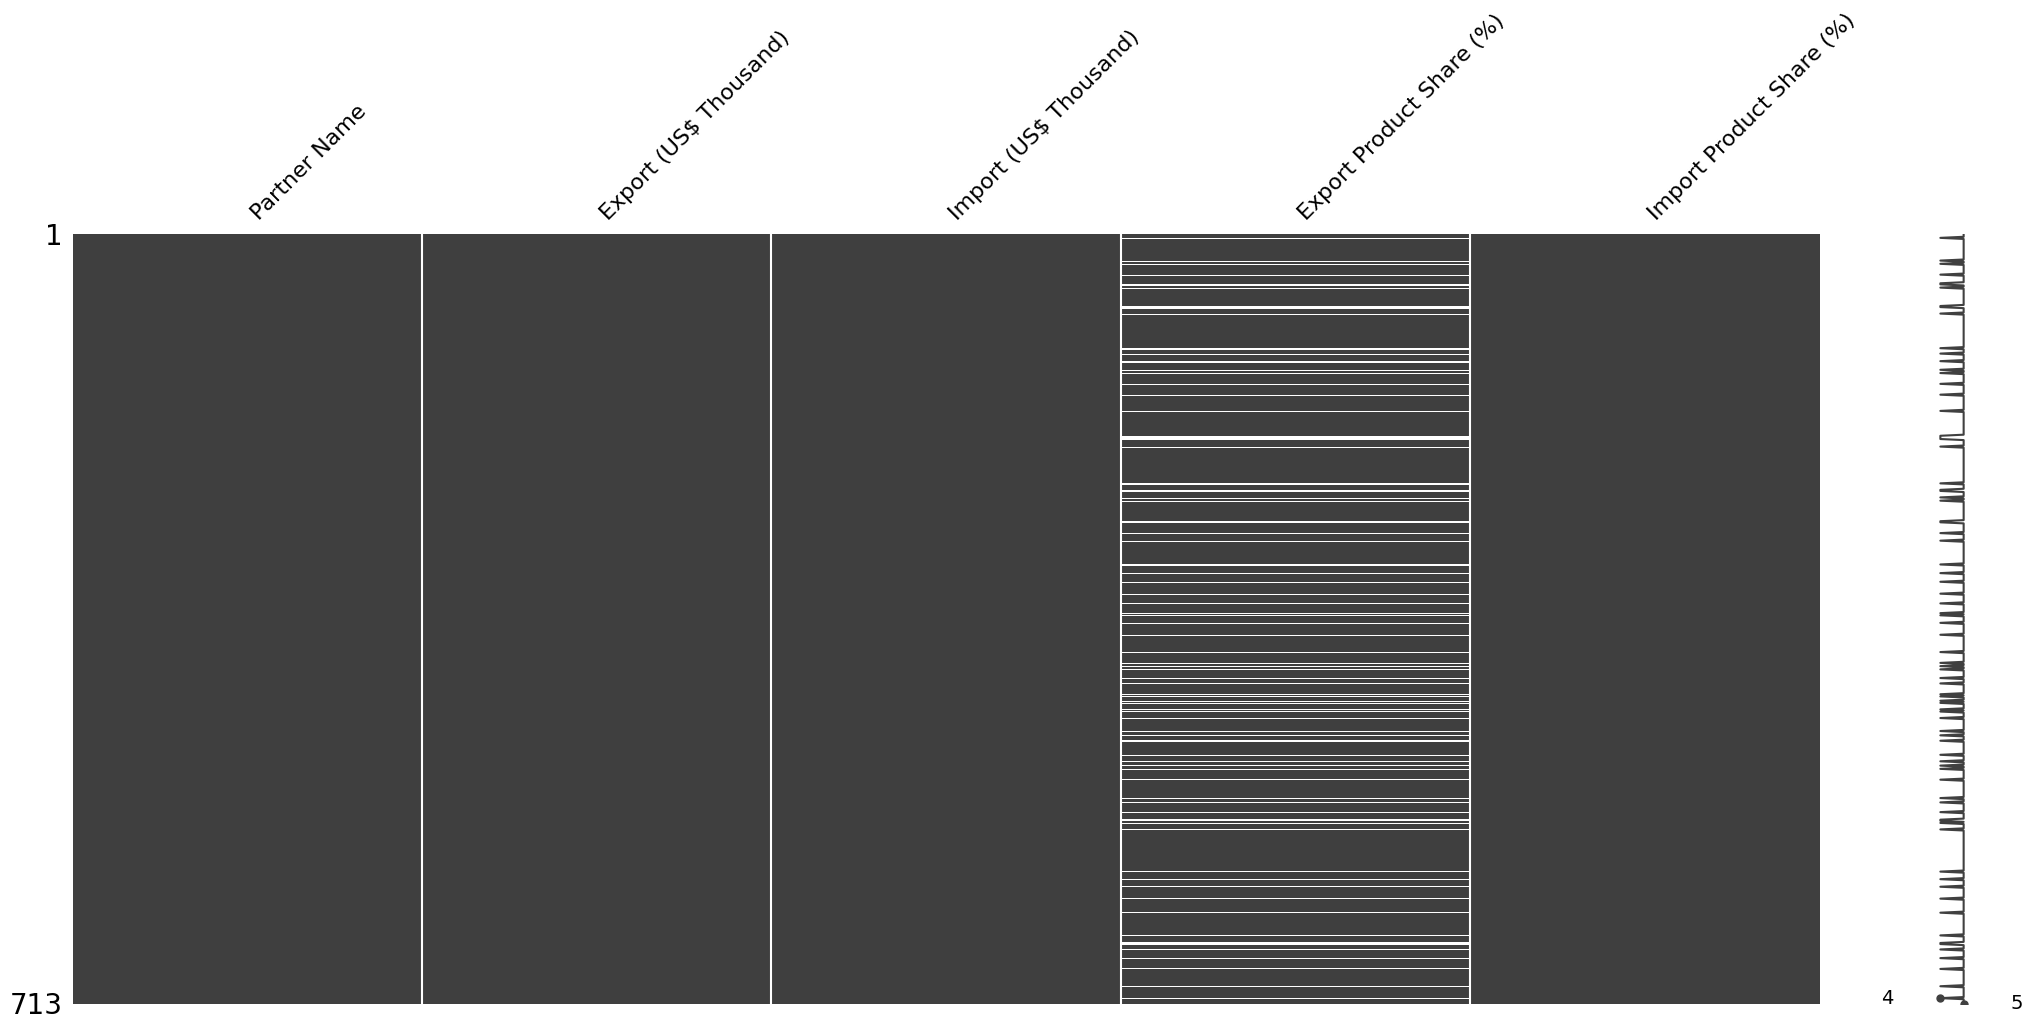

In [9]:
# Combining all the dataframes and finding the missing values in each column

lists=[y12,y13,y14,y15,y16,y17]
yall=pd.concat(lists)
msno.matrix(yall)

In [10]:
# Since the Export Product Share can't be determined directly, we can't impute it with any method
# So we have filled all the missing values with 0

y12['Export Product Share (%)']=y12['Export Product Share (%)'].fillna(0)
y13['Export Product Share (%)']=y13['Export Product Share (%)'].fillna(0)
y14['Export Product Share (%)']=y14['Export Product Share (%)'].fillna(0)
y15['Export Product Share (%)']=y15['Export Product Share (%)'].fillna(0)
y16['Export Product Share (%)']=y16['Export Product Share (%)'].fillna(0)
y17['Export Product Share (%)']=y17['Export Product Share (%)'].fillna(0)

<Axes: >

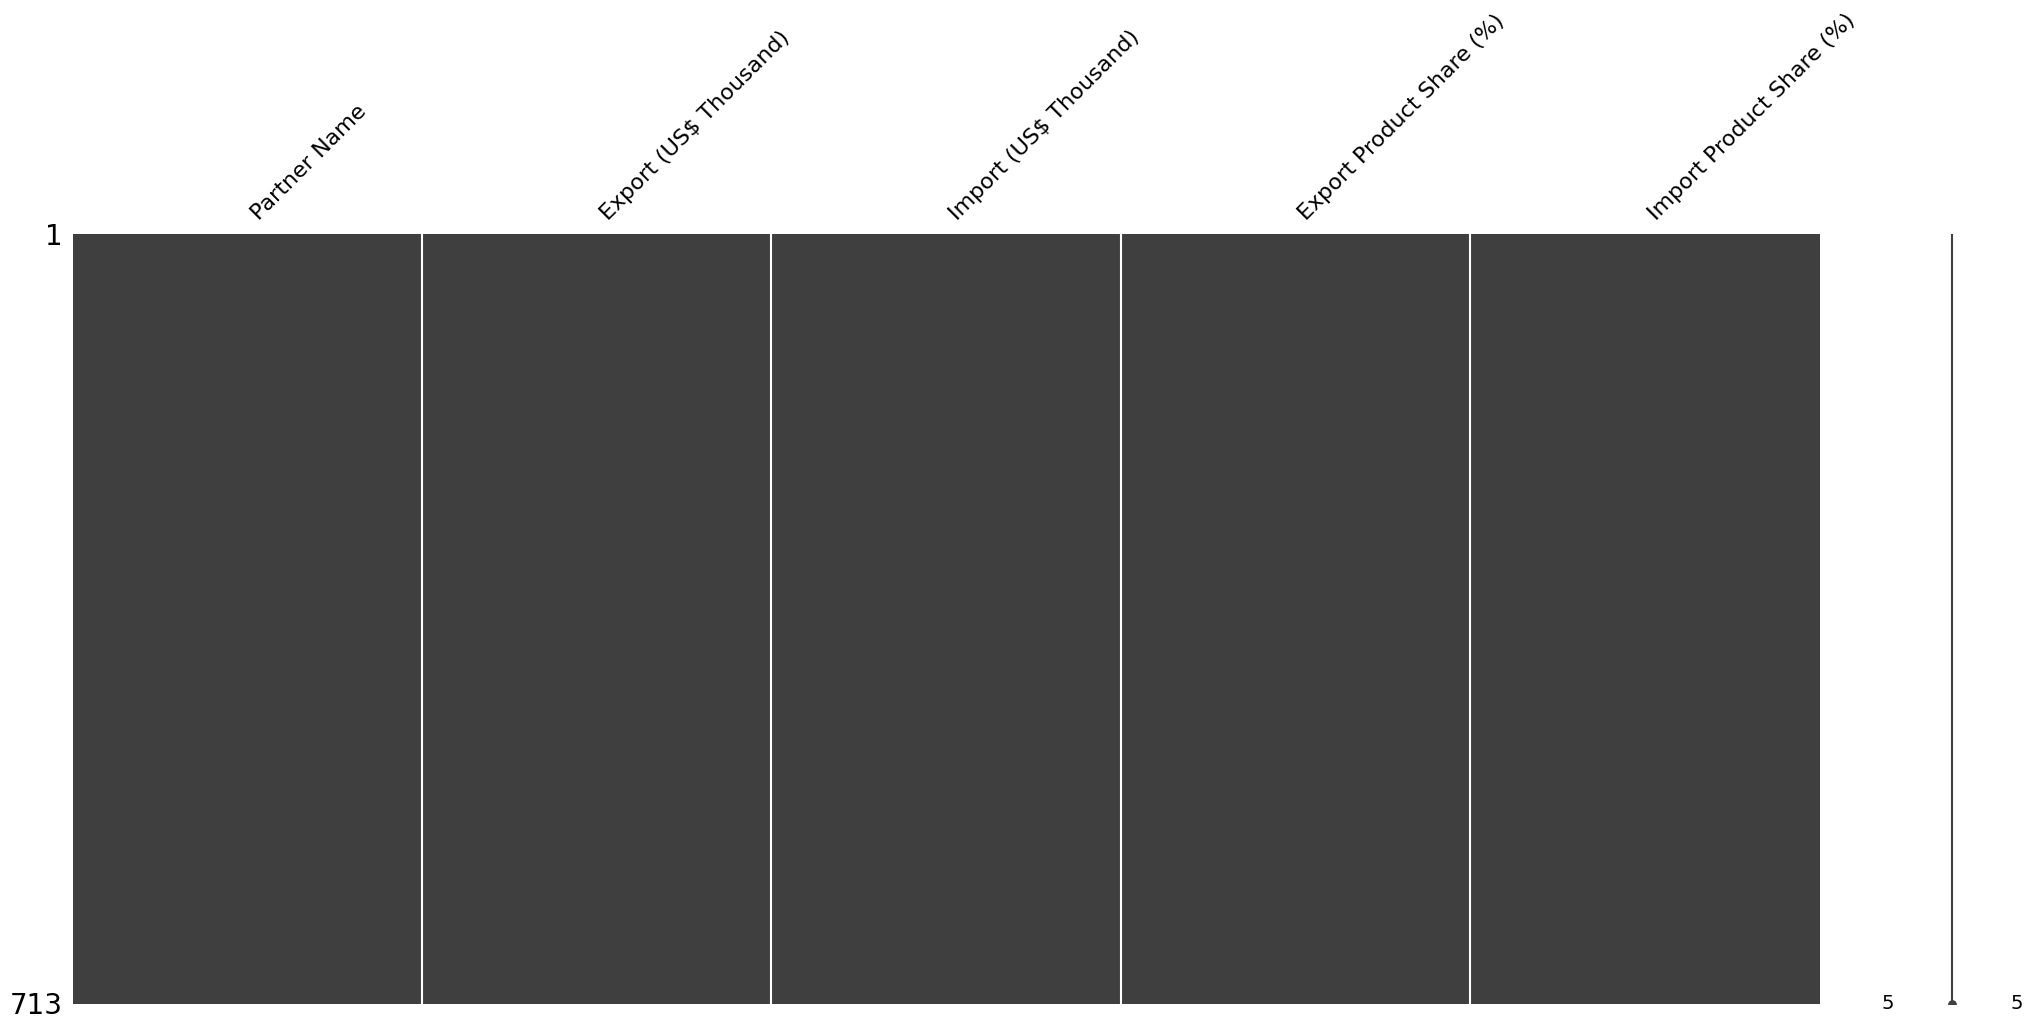

In [11]:
# Rechecking for missing values left, if any

lists=[y12,y13,y14,y15,y16,y17]
yall=pd.concat(lists)

msno.matrix(yall)

In [12]:
# Renaming the columns to distinguish similar columns of each datatype to disregard any ambiguity

y12.columns=['Index','y12_export','y12_import','y12_exportProductShare','y12_importProductShare']
y13.columns=['Index','y13_export','y13_import','y13_exportProductShare','y13_importProductShare']
y14.columns=['Index','y14_export','y14_import','y14_exportProductShare','y14_importProductShare']
y15.columns=['Index','y15_export','y15_import','y15_exportProductShare','y15_importProductShare']
y16.columns=['Index','y16_export','y16_import','y16_exportProductShare','y16_importProductShare']
y17.columns=['Index','y17_export','y17_import','y17_exportProductShare','y17_importProductShare']

In [13]:
# Merging all data frame by appending the columns in one dataframe and filtering the data frame to have only common values

yall= pd.merge(y12,y13, how='inner', left_on='Index', right_on='Index')
yall= pd.merge(yall,y14, how='inner', left_on='Index', right_on='Index')
yall= pd.merge(yall,y15, how='inner', left_on='Index', right_on='Index')
yall= pd.merge(yall,y16, how='inner', left_on='Index', right_on='Index')
yall= pd.merge(yall,y17, how='inner', left_on='Index', right_on='Index')

In [14]:
yall.shape

(85, 25)

In [15]:
yall.dtypes

Index                      object
y12_export                float64
y12_import                float64
y12_exportProductShare    float64
y12_importProductShare    float64
y13_export                float64
y13_import                float64
y13_exportProductShare    float64
y13_importProductShare    float64
y14_export                float64
y14_import                float64
y14_exportProductShare    float64
y14_importProductShare    float64
y15_export                float64
y15_import                float64
y15_exportProductShare    float64
y15_importProductShare    float64
y16_export                float64
y16_import                float64
y16_exportProductShare    float64
y16_importProductShare    float64
y17_export                float64
y17_import                float64
y17_exportProductShare    float64
y17_importProductShare    float64
dtype: object

### Initial Data Analysis

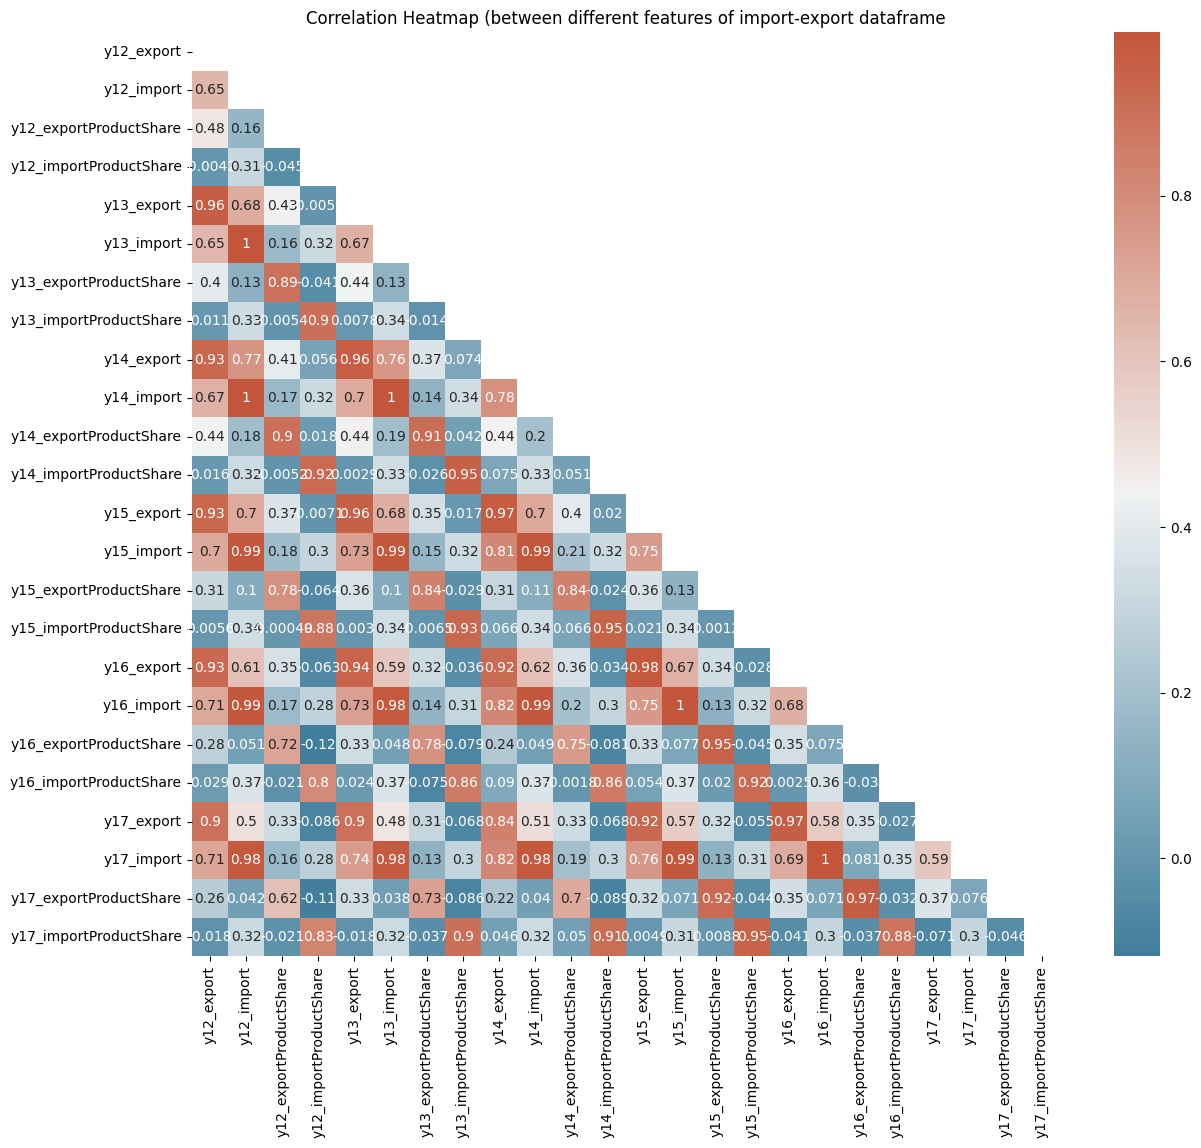

In [16]:
corr = yall.corr(numeric_only=True)
f, ax = plt.subplots(figsize=(14, 12))
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)
plt.title("Correlation Heatmap (between different features of import-export dataframe", fontsize = 12)
plt.show()

In [17]:
# Divinding the merged dataframe into country wise export value dataframe
country_export_df = yall[['Index','y12_export','y13_export','y14_export','y15_export','y16_export','y17_export']]

# Divinding the merged dataframe into country wise import value dataframe
country_import_df = yall[['Index','y12_import','y13_import','y14_import','y15_import','y16_import','y17_import']]

# Divinding the merged dataframe into country wise export share dataframe
country_exportshare_df = yall[['Index','y12_exportProductShare','y13_exportProductShare','y14_exportProductShare','y15_exportProductShare','y16_exportProductShare','y17_exportProductShare',]]

# Divinding the merged dataframe into country wise import share dataframe
country_importshare_df = yall[['Index','y12_importProductShare','y13_importProductShare','y14_importProductShare','y15_importProductShare','y16_importProductShare','y17_importProductShare',]]

In [18]:
# This function transpose the dataframe and reindex it according to new columns

def df_transpose(df):
  df = df.set_index(df.columns[0])
  column = list(df.columns)
  df = df.T
  df = df.reindex(column)
  df.reset_index(inplace = True)
  df.rename(columns = {'index':'Year'}, inplace = True)
  return df

In [19]:
# Transposing each dataframe to get year wise data for each country to understand the trends of imports and exports

importvalue_df = df_transpose(country_import_df)
exportvalue_df = df_transpose(country_export_df)

importshare_df = df_transpose(country_importshare_df)
exportshare_df = df_transpose(country_exportshare_df)

In [20]:
importvalue_df.head(7)

Index        Year      Angola  United Arab Emirates   Australia  Austria  \
0      y12_import  7951282.29           15431945.52  6344647.47  2301.67   
1      y13_import  6729562.98           14104323.47  5445138.70  1051.58   
2      y14_import  5463023.37           14423678.50  5487326.48     6.86   
3      y15_import  3047481.50            8545251.19  5389049.40   115.11   
4      y16_import  1797159.57            8060527.45  5339415.93    28.88   
5      y17_import  3525098.81            9323674.79  9040530.22  4660.33   

Index  Azerbaijan   Belgium  Bangladesh    Bahrain      Brazil  ...    Sweden  \
0      1754286.61  16120.87    20483.60  528770.61  3518730.13  ...   9202.25   
1       970669.64   5897.47    17939.15  367986.65  1788346.29  ...  23478.48   
2       415580.68   9017.05        4.57  214686.41  3051096.32  ...  29033.41   
3        76158.41  99003.17    20048.01  104125.56  1334495.23  ...  22256.40   
4       274663.60  53252.38    34864.16   61234.56  1013784.34  ...  22835.44   
5       538809.78  71445.23    21123.08   50746.61  1724302.02  ...  28063.76   

Index  Thailand     Turkey    Ukraine  Unspecified  United States  \
0      27585.39   12608.99  326557.98    209369.16     1869823.39   
1      47134.03  269583.26  214879.47    141611.44     1572219.70   
2      60409.33  635649.95  192118.82    122197.54     1537849.17   
3      38938.15  229145.96    9155.80    628316.21     1324852.30   
4      46844.89  421438.05    6595.08    212624.89     1355208.72   
5      37814.85  211204.03   15889.11    261383.61     3264039.10   

Index    Venezuela   Vietnam      Yemen  South Africa  
0      12112789.88  68426.83  928358.26    1736614.45  
1      14942614.61  13081.06  904447.84    1978635.69  
2      13132051.29   7473.63  382678.48    2308384.31  
3       6619011.33   8924.73  167516.38    2429392.44  
4       5071877.66   5624.93       1.79    2054689.00  
5       5891287.47  18862.32   71022.62    2730809.49  

[6 rows x 86 columns]

In [21]:
exportvalue_df.head(5)

Index        Year  Angola  United Arab Emirates   Australia  Austria  \
0      y12_export  126.22            6510661.45   224974.96    20.75   
1      y13_export    8.98            5584636.79    58360.63  5243.87   
2      y14_export   90.61            7208789.50   363934.70    79.59   
3      y15_export   81.74            4090941.99  1105168.27    12.24   
4      y16_export   38.23            3698482.94   769585.28    14.75   

Index  Azerbaijan    Belgium  Bangladesh    Bahrain      Brazil  ...  Sweden  \
0            6.29   94250.67    97078.28   97294.93  3427085.61  ...  208.35   
1            6.77  693933.61   161946.61  222629.06  3009524.70  ...  678.47   
2          191.93  103384.77   181048.42    6049.53  4296073.42  ...  180.30   
3            0.00   33355.62   148090.55    4344.48   793147.98  ...  141.71   
4            0.00   42732.77   150294.86    3706.31   105967.11  ...   94.73   

Index  Thailand      Turkey  Ukraine  Unspecified  United States  Venezuela  \
0      28376.34   890232.21  1426.95    405907.59     1221903.63      56.77   
1      71162.68   815674.35  2366.34   5127348.41     3747163.53       0.00   
2      67772.64  1545084.04   994.05    812991.95     4517718.12      30.52   
3      47155.91  1053074.29   883.58   1062227.19     2142375.85      49.12   
4      35415.75  1016248.54  1041.10   1018261.36     1957503.69      32.76   

Index    Vietnam      Yemen  South Africa  
0       19809.08  256299.23    1803731.96  
1       39462.83  462296.12    2002591.06  
2       66676.46  501624.58    1957695.15  
3        8876.40    1682.21     786810.94  
4      129307.62    2214.14     699660.80  

[5 rows x 86 columns]

In [22]:
importshare_df.head(5)

Index                    Year  Angola  United Arab Emirates  Australia  \
0      y12_importProductShare   99.14                 40.83      49.07   
1      y13_importProductShare   98.99                 42.79      50.08   
2      y14_importProductShare   96.83                 52.86      55.23   
3      y15_importProductShare   96.15                 42.13      57.26   
4      y16_importProductShare   89.77                 41.89      61.16   

Index  Austria  Azerbaijan  Belgium  Bangladesh  Bahrain  Brazil  ...  Sweden  \
0         0.23       99.82     0.16        3.61    58.05   65.23  ...    0.50   
1         0.12       99.32     0.06        3.38    61.97   46.67  ...    1.40   
2         0.00       98.43     0.08        0.00    48.31   55.03  ...    1.67   
3         0.01       92.75     1.19        3.13    29.29   32.49  ...    1.41   
4         0.00       97.84     0.71        5.15    18.96   28.05  ...    1.92   

Index  Thailand  Turkey  Ukraine  Unspecified  United States  Venezuela  \
0          0.50    1.20    13.01        20.05           7.76      99.91   
1          0.86   30.91    10.18         7.11           6.96      99.96   
2          1.06   47.17     8.75         1.81           7.52      99.54   
3          0.69   23.16     0.51         7.39           6.47      99.67   
4          0.88   37.30     0.34         2.46           6.64      99.84   

Index  Vietnam  Yemen  South Africa  
0         3.52  98.40         21.61  
1         0.46  97.88         26.91  
2         0.27  94.35         38.51  
3         0.33  93.48         38.71  
4         0.18   0.04         40.35  

[5 rows x 86 columns]

In [23]:
exportshare_df.head(5)

Index                    Year  Angola  United Arab Emirates  Australia  \
0      y12_exportProductShare    0.02                 18.20       8.54   
1      y13_exportProductShare    0.00                 16.43       2.43   
2      y14_exportProductShare    0.01                 21.90      14.03   
3      y15_exportProductShare    0.03                 13.64      33.98   
4      y16_exportProductShare    0.03                 12.31      26.10   

Index  Austria  Azerbaijan  Belgium  Bangladesh  Bahrain  Brazil  ...  Sweden  \
0         0.01        0.01     1.70        1.97    15.90   55.61  ...    0.03   
1         1.42        0.01    10.12        2.70    32.33   49.24  ...    0.09   
2         0.02        0.17     1.75        2.89     1.27   60.16  ...    0.02   
3         0.00        0.00     0.67        2.68     0.79   25.59  ...    0.02   
4         0.00        0.00     0.80        2.65     0.78    4.61  ...    0.01   

Index  Thailand  Turkey  Ukraine  Unspecified  United States  Venezuela  \
0          0.82   24.24     0.28        16.67           3.29       0.02   
1          1.69   17.91     0.46        60.48           8.93       0.00   
2          1.97   27.58     0.24        34.71          10.58       0.01   
3          1.51   23.74     0.35        56.62           5.31       0.03   
4          1.20   22.72     0.36        63.63           4.66       0.04   

Index  Vietnam  Yemen  South Africa  
0         0.54  25.56         36.27  
1         0.66  34.55         34.87  
2         1.02  37.66         34.21  
3         0.17   0.36         20.63  
4         2.17   0.49         21.57  

[5 rows x 86 columns]

### Exploratory Data Analysis

In [24]:
# Function to plot linechart of each of the above dataframe with year on x-axis and corresponding values on y-axis

def plot_linecharts(df, x):
    y = []
    for i in range(1, df.shape[1]):
        y.append(df.iloc[:, i])

    for i in range(1, df.shape[1]):
        plt.plot(x , y[i-1], label = df.columns[i])

    plt.xticks(rotation = 45, fontsize = 10)
    plt.yscale('log')
    plt.legend()

In [25]:
# y12 - year 2012
# y13 - year 2013
# y14 - year 2014
# y15 - year 2015
# y16 - year 2016
# y17 - year 2017

**Line Charts to understand trend of Import and Export value of each country**

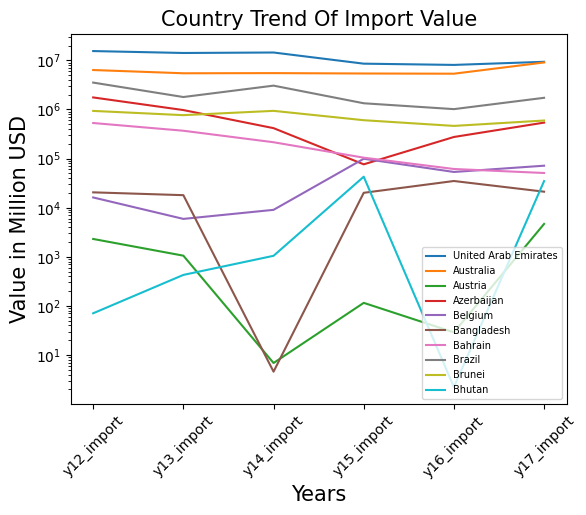

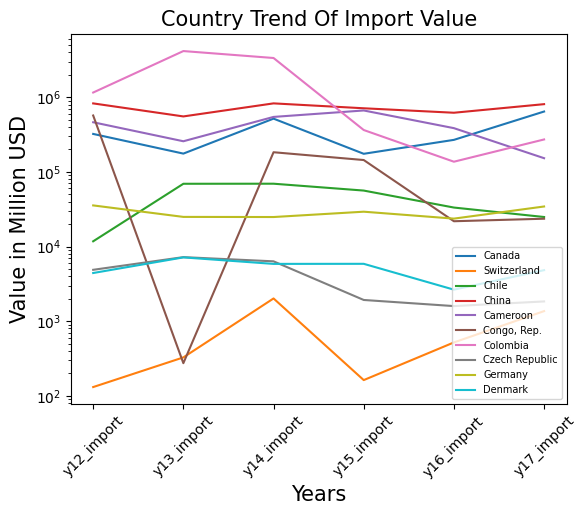

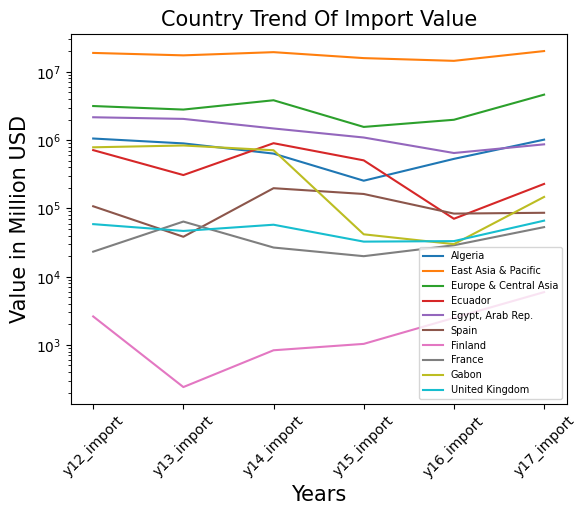

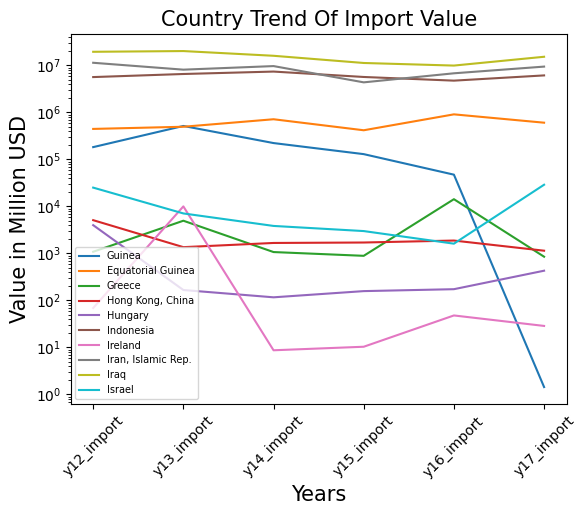

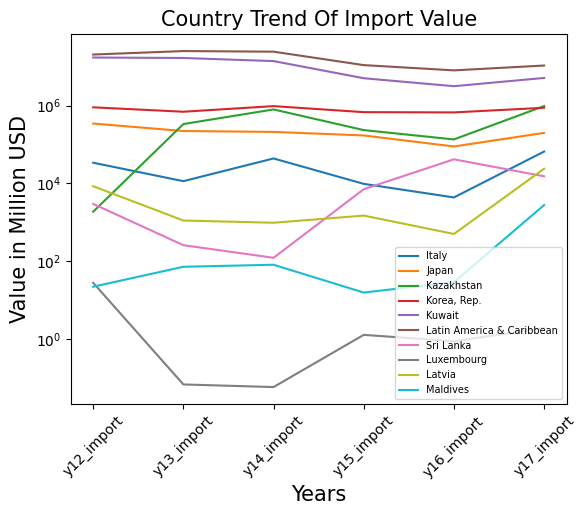

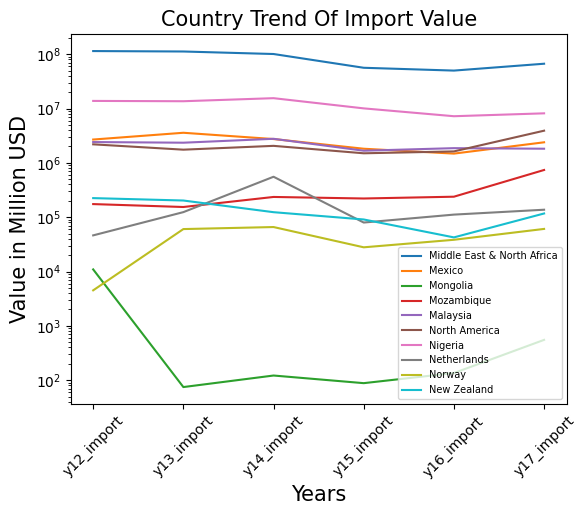

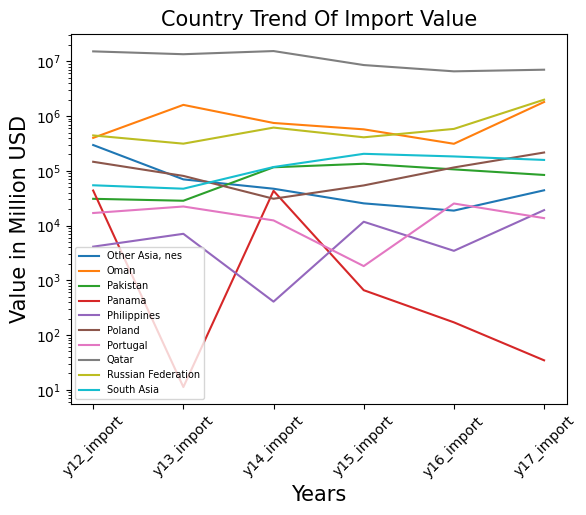

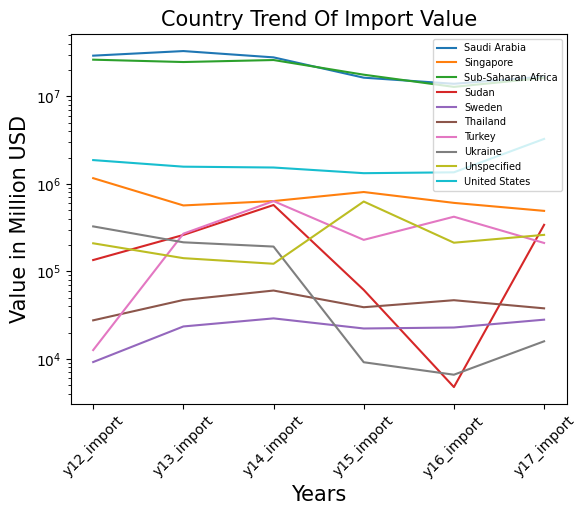

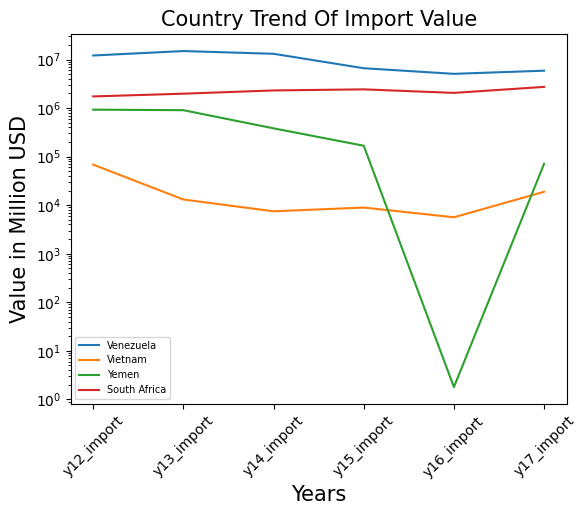

In [26]:
for i in range(1, importvalue_df.shape[1], 10):
    plot_linecharts(importvalue_df.iloc[:, i:i+11], importvalue_df.iloc[:, 0])
    plt.xlabel("Years", fontsize = 15)
    plt.ylabel("Value in Million USD", fontsize = 15)
    plt.title("Country Trend Of Import Value", fontsize = 15)
    plt.legend(loc='best', fontsize=7)
    plt.show()

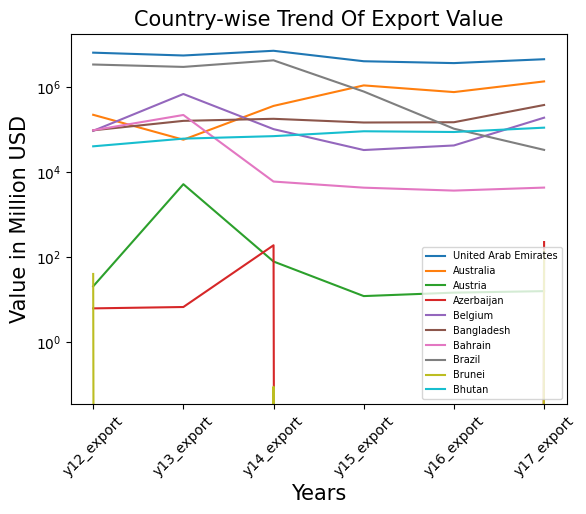

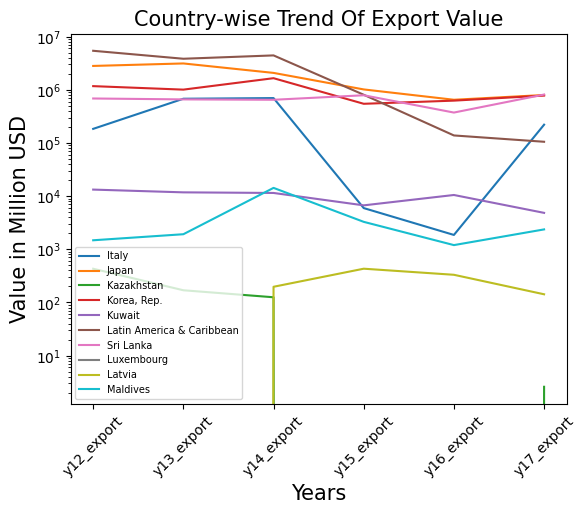

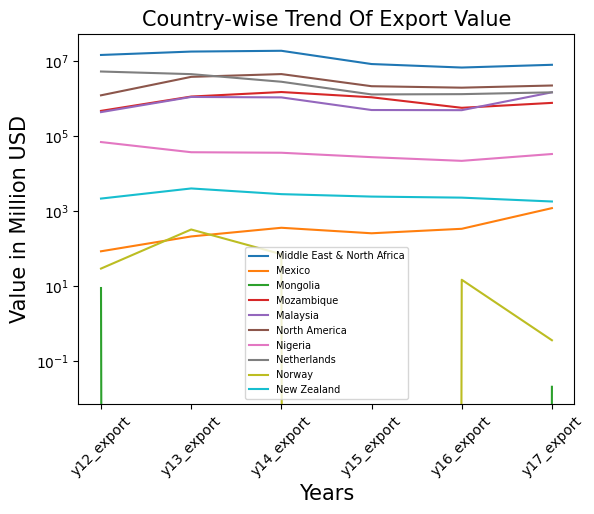

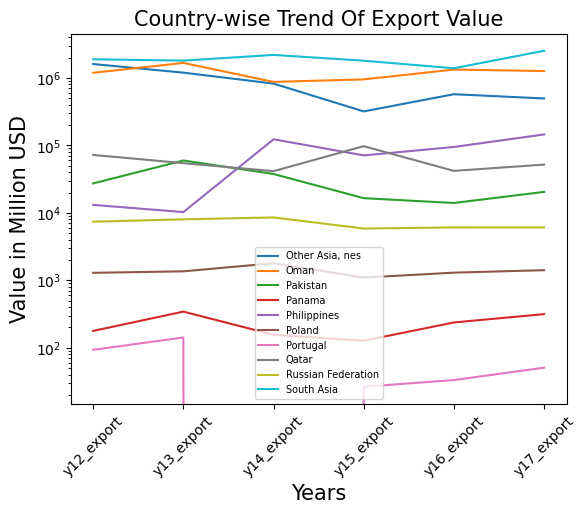

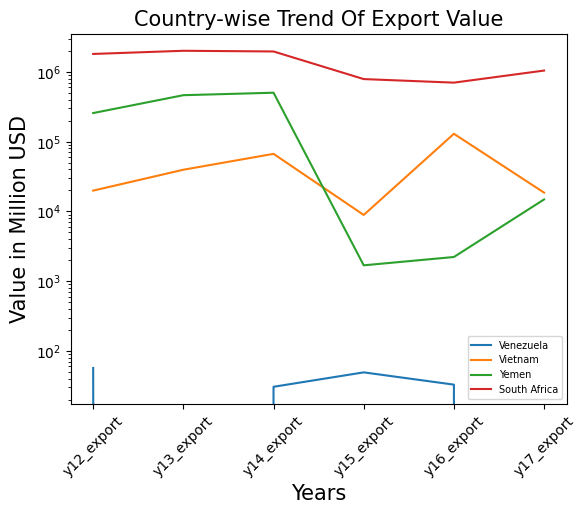

In [27]:
for i in range(1, exportvalue_df.shape[1], 10):
    plot_linecharts(exportvalue_df.iloc[:, i:i+11], exportvalue_df.iloc[:, 0])
    plt.xlabel("Years", fontsize = 15)
    plt.ylabel("Value in Million USD", fontsize = 15)
    plt.title("Country-wise Trend Of Export Value", fontsize = 15)
    plt.legend(loc='best', fontsize=7)
    plt.show()

**Line Charts to understand trend of Import and Export share of each country**

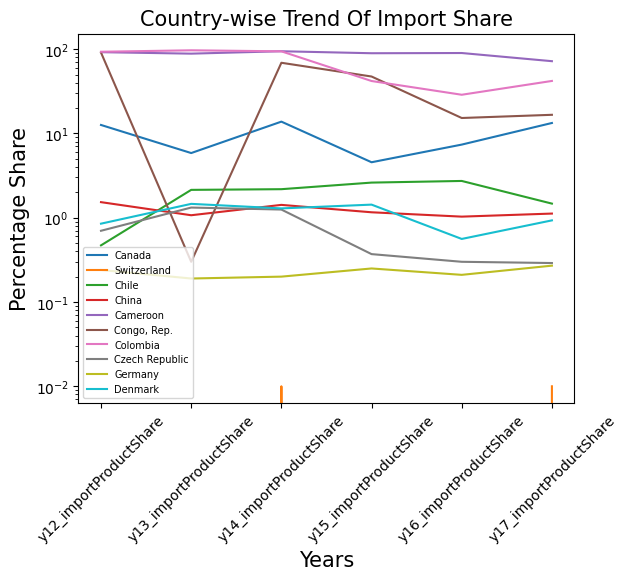

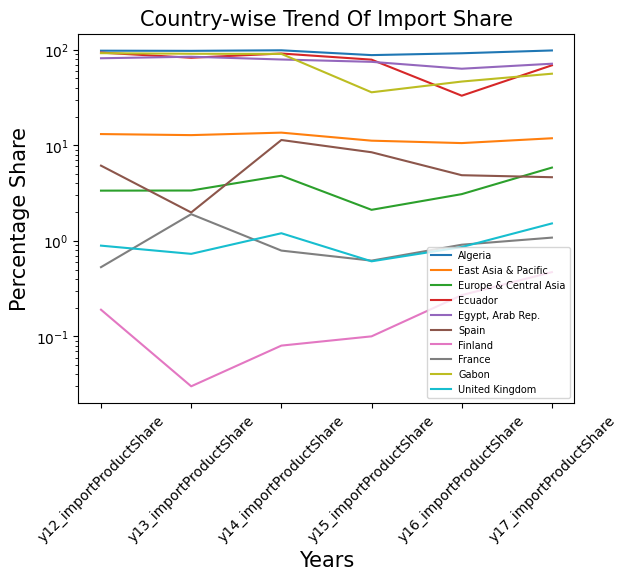

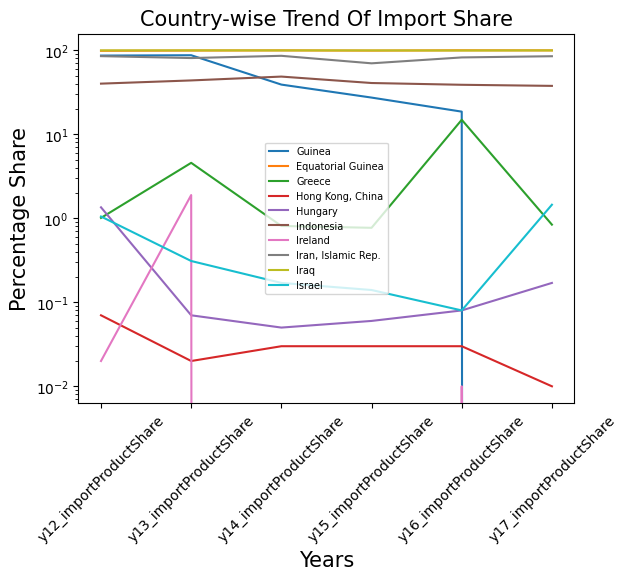

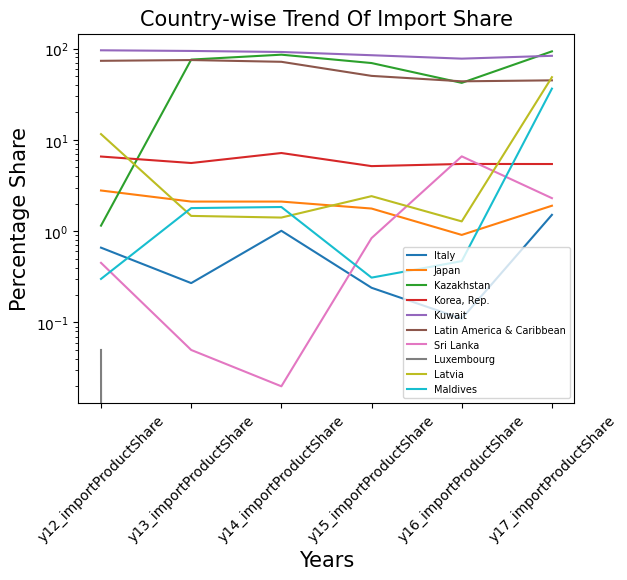

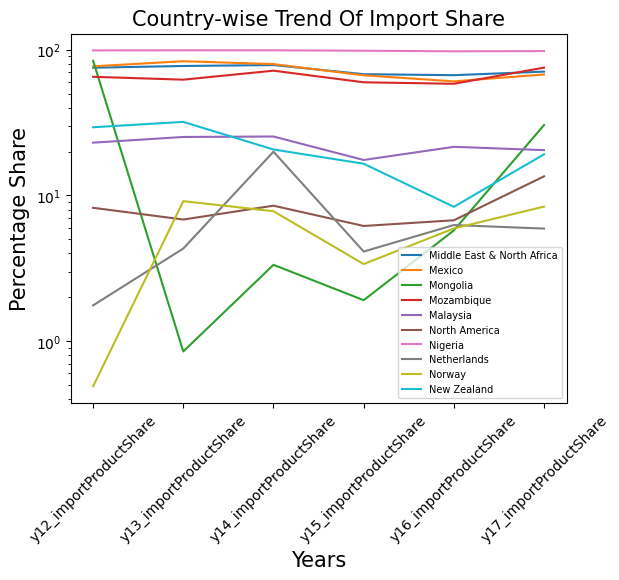

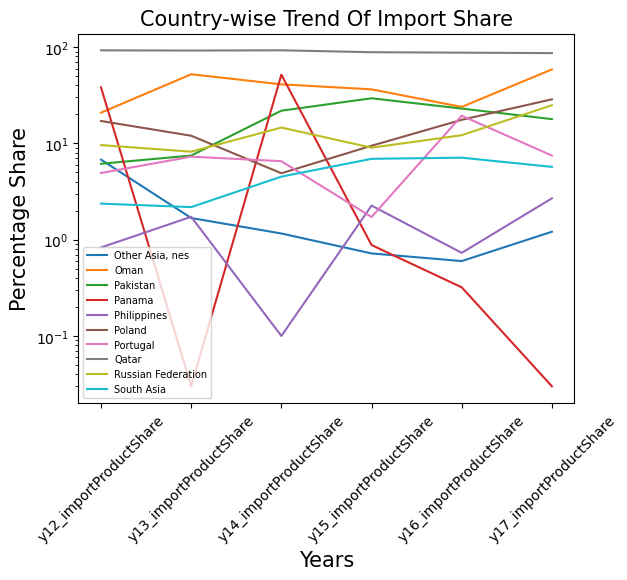

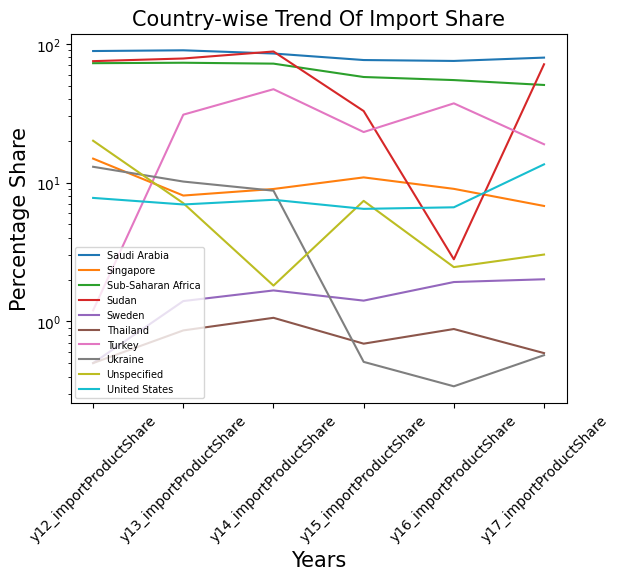

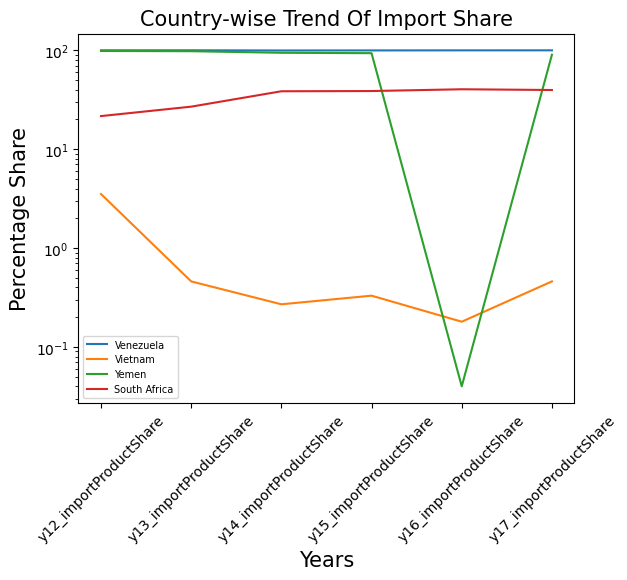

In [28]:
for i in range(1, importshare_df.shape[1], 10):
    plot_linecharts(importshare_df.iloc[:, i:i+11], importshare_df.iloc[:, 0])
    plt.xlabel("Years", fontsize = 15)
    plt.ylabel("Percentage Share", fontsize = 15)
    plt.title("Country-wise Trend Of Import Share", fontsize = 15)
    plt.legend(loc='best', fontsize=7)
    plt.show()

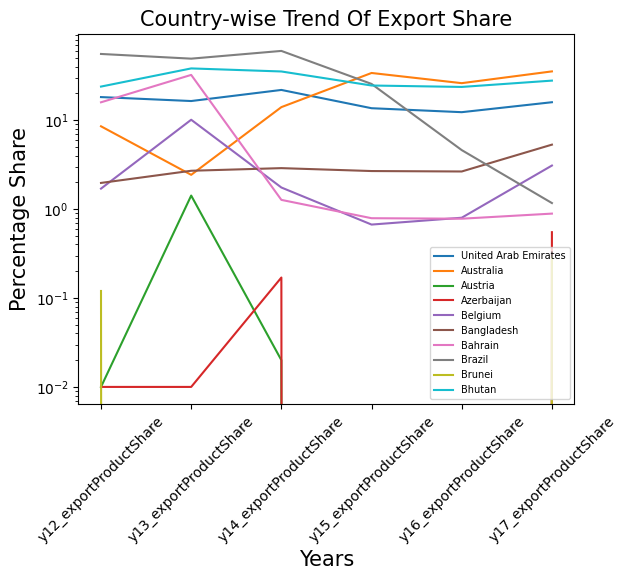

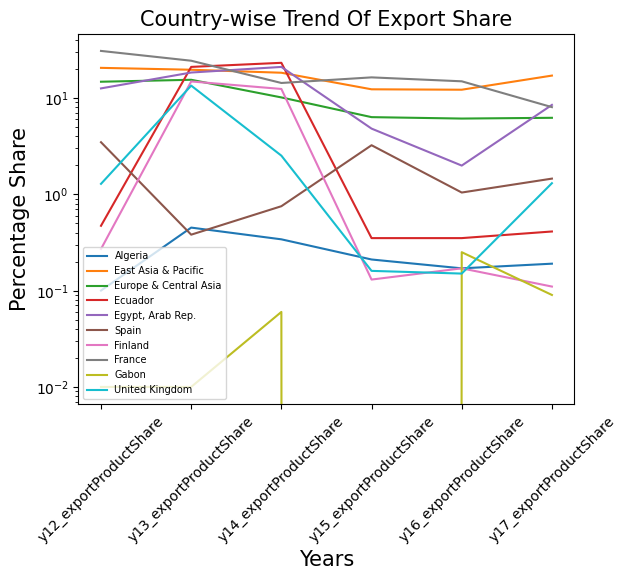

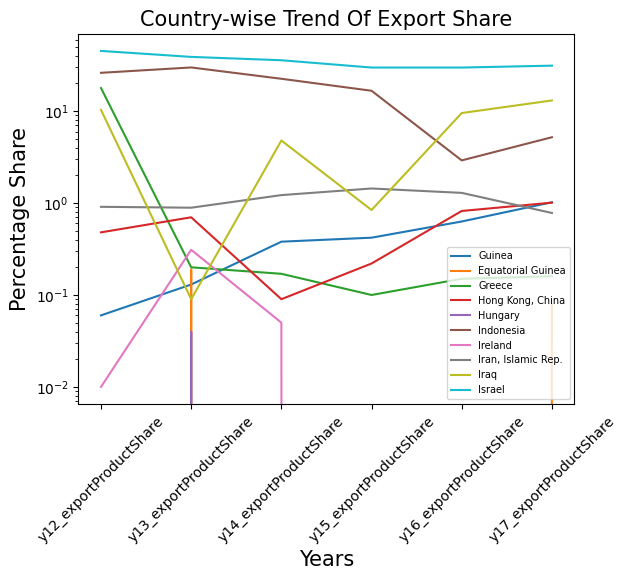

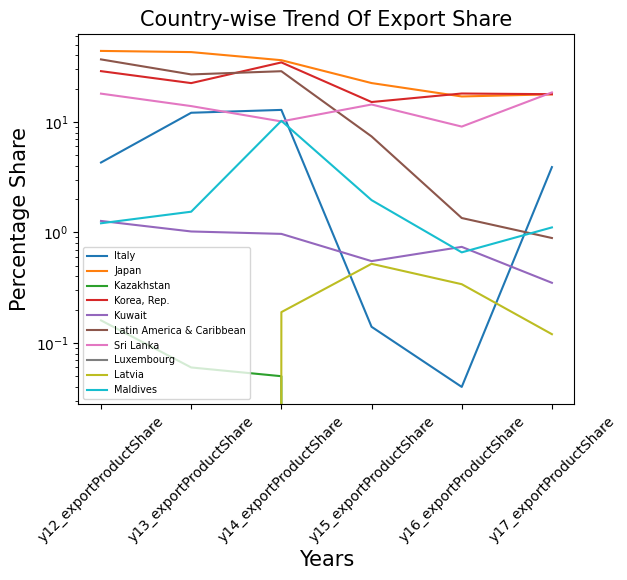

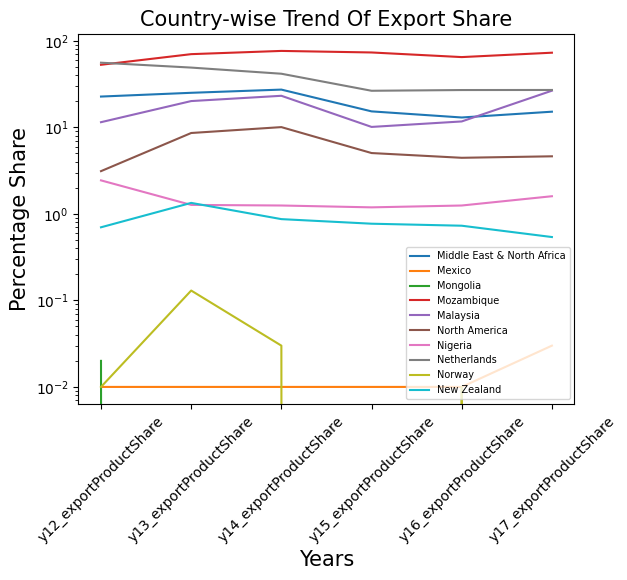

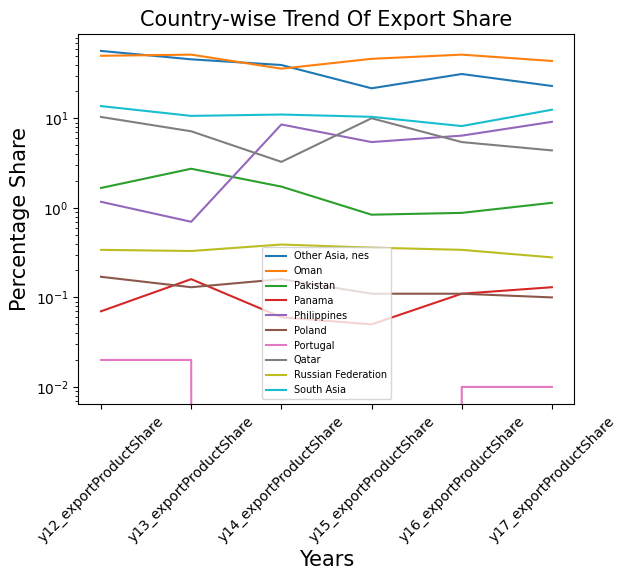

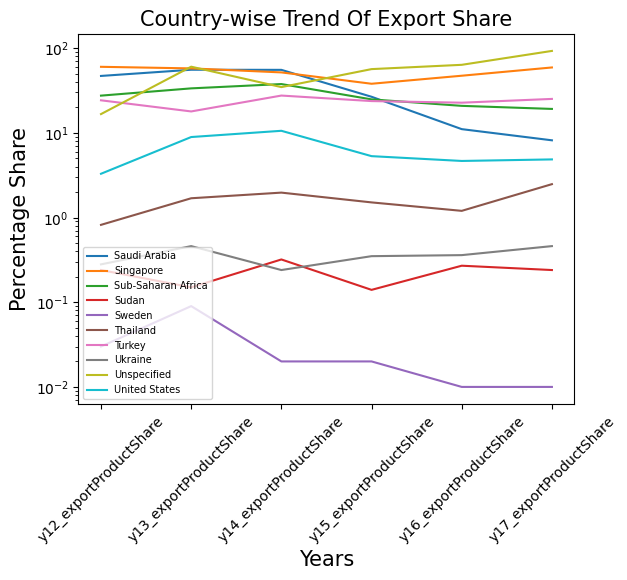

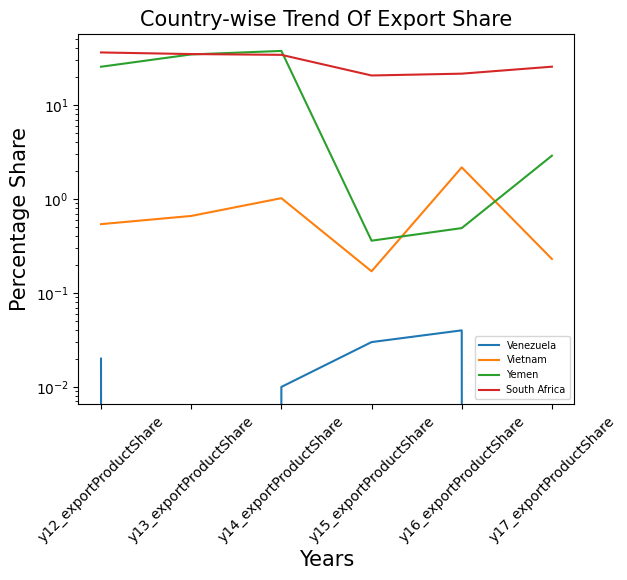

In [29]:
for i in range(1, exportshare_df.shape[1], 10):
    plot_linecharts(exportshare_df.iloc[:, i:i+11], exportshare_df.iloc[:, 0])
    plt.xlabel("Years", fontsize = 15)
    plt.ylabel("Percentage Share", fontsize = 15)
    plt.title("Country-wise Trend Of Export Share", fontsize = 15)
    plt.legend(loc='best', fontsize=7)
    plt.show()

### 2) Second type of dataset - India's Import and Export Value and Quantity of different components of crude oil

### Reading the second dataset csv file

In [30]:
crude_df = pd.read_csv('/content/crude_data.csv')
crude_df.head(5)

Item  2012 - Qty. - TMT  \
0              Imports - Crude Oil Import             184173   
1                    Product Import - LPG               6556   
2                 Product Import - Petrol                147   
3                Product Import - Naphtha               1861   
4  Product Import - Aviation Turbine Fuel                  0   

   2012 - Value - Rs. Crore  2012 - Value - Million USD  2013 - Qty. - TMT  \
0                    783418                      146882             189351   
1                     33266                        6247               6016   
2                       891                         160                235   
3                      9731                        1809               1177   
4                         0                           0                  0   

   2013 - Value - Rs. Crore  2013 - Value - Million USD  2014 - Qty. - TMT  \
0                    846591                      144359             188772   
1                     32802                        5522               8050   
2                      1481                         248                328   
3                      6789                        1138                623   
4                         0                           0                 90   

   2014 - Value - Rs. Crore  2014 - Value - Million USD  2015 - Qty. - TMT  \
0                    798637                      130998             196490   
1                     41177                        6774               8901   
2                      2115                         346                984   
3                      3665                         597               2797   
4                       513                          83                273   

   2015 - Value - Rs. Crore  2015 - Value - Million USD  2016 - Qty. - TMT  \
0                    446469                       69658             215376   
1                     27110                        4203              10197   
2                      4157                         643                549   
3                      9624                        1492               2926   
4                       919                         142                333   

   2016 - Value - Rs. Crore  2016 - Value - Million USD  \
0                    415672                       61889   
1                     26139                        3870   
2                      1854                         274   
3                      8243                        1218   
4                      1010                         149   

   2017 (P) - Qty. - TMT  2017 (P) - Value - Rs. Crore  \
0                 216445                        528345   
1                  11888                         40241   
2                    174                           581   
3                   1879                          6579   
4                    273                          1039   

   2017 (P) - Value - Million USD  
0                           81338  
1                            6155  
2                              91  
3                            1002  
4                             158

### Data Preprocessing and Cleaning

In [31]:
crude_df = crude_df.drop(['2012 - Value - Rs. Crore','2013 - Value - Rs. Crore','2014 - Value - Rs. Crore','2015 - Value - Rs. Crore','2016 - Value - Rs. Crore','2017 (P) - Value - Rs. Crore'], axis=1)

In [32]:
crude_df.columns

Index(['Item', '2012 - Qty. - TMT', '2012 - Value - Million USD',
       '2013 - Qty. - TMT', '2013 - Value - Million USD', '2014 - Qty. - TMT',
       '2014 - Value - Million USD', '2015 - Qty. - TMT',
       '2015 - Value - Million USD', '2016 - Qty. - TMT',
       '2016 - Value - Million USD', '2017 (P) - Qty. - TMT',
       '2017 (P) - Value - Million USD'],
      dtype='object')

In [33]:
new_row = pd.DataFrame({'Item' : ['Product Import - LDO'], '2012 - Qty. - TMT' : [0], '2012 - Value - Million USD' : [0], '2013 - Qty. - TMT' : [0], 
                        '2013 - Value - Million USD' : [0], '2014 - Qty. - TMT' : [0], '2014 - Value - Million USD' : [0], '2015 - Qty. - TMT' : [0],
                        '2015 - Value - Million USD' : [0], '2016 - Qty. - TMT' : [0], '2016 - Value - Million USD' : [0], '2017 (P) - Qty. - TMT' : [0],
                        '2017 (P) - Value - Million USD' : [0]})

crude_df = pd.concat([crude_df.loc[:6], new_row, crude_df.loc[7:]]).reset_index(drop=True)

crude_df.head(8)

Item  2012 - Qty. - TMT  \
0              Imports - Crude Oil Import             184173   
1                    Product Import - LPG               6556   
2                 Product Import - Petrol                147   
3                Product Import - Naphtha               1861   
4  Product Import - Aviation Turbine Fuel                  0   
5               Product Import - Kerosene                  0   
6                 Product Import - Diesel                783   
7                    Product Import - LDO                  0   

   2012 - Value - Million USD  2013 - Qty. - TMT  2013 - Value - Million USD  \
0                      146882             189351                      144359   
1                        6247               6016                        5522   
2                         160                235                         248   
3                        1809               1177                        1138   
4                           0                  0                           0   
5                           0                  0                           0   
6                         766                 81                          76   
7                           0                  0                           0   

   2014 - Qty. - TMT  2014 - Value - Million USD  2015 - Qty. - TMT  \
0             188772                      130998             196490   
1               8050                        6774               8901   
2                328                         346                984   
3                623                         597               2797   
4                 90                          83                273   
5                 30                          29                 41   
6                108                         103                 72   
7                  0                           0                  0   

   2015 - Value - Million USD  2016 - Qty. - TMT  2016 - Value - Million USD  \
0                       69658             215376                       61889   
1                        4203              10197                        3870   
2                         643                549                         274   
3                        1492               2926                        1218   
4                         142                333                         149   
5                          25                  0                           0   
6                          63                975                         399   
7                           0                  0                           0   

   2017 (P) - Qty. - TMT  2017 (P) - Value - Million USD  
0                 216445                           81338  
1                  11888                            6155  
2                    174                              91  
3                   1879                            1002  
4                    273                             158  
5                      0                               0  
6                   1436                             688  
7                      0                               0

In [34]:
import_df = crude_df.iloc[1:13,:]
import_df = import_df.reset_index(drop=True)

for i in range(0,import_df.shape[0]):
  import_df['Item'][i]=import_df['Item'][i].replace('Product Import - ', '')

import_df.head(5)

Item  2012 - Qty. - TMT  2012 - Value - Million USD  \
0                    LPG               6556                        6247   
1                 Petrol                147                         160   
2                Naphtha               1861                        1809   
3  Aviation Turbine Fuel                  0                           0   
4               Kerosene                  0                           0   

   2013 - Qty. - TMT  2013 - Value - Million USD  2014 - Qty. - TMT  \
0               6016                        5522               8050   
1                235                         248                328   
2               1177                        1138                623   
3                  0                           0                 90   
4                  0                           0                 30   

   2014 - Value - Million USD  2015 - Qty. - TMT  2015 - Value - Million USD  \
0                        6774               8901                        4203   
1                         346                984                         643   
2                         597               2797                        1492   
3                          83                273                         142   
4                          29                 41                          25   

   2016 - Qty. - TMT  2016 - Value - Million USD  2017 (P) - Qty. - TMT  \
0              10197                        3870                  11888   
1                549                         274                    174   
2               2926                        1218                   1879   
3                333                         149                    273   
4                  0                           0                      0   

   2017 (P) - Value - Million USD  
0                            6155  
1                              91  
2                            1002  
3                             158  
4                               0

In [35]:
import_df.shape

(12, 13)

In [36]:
import_df.describe()

2012 - Qty. - TMT  2012 - Value - Million USD  2013 - Qty. - TMT  \
count          12.000000                   12.000000          12.000000   
mean         1373.083333                 1105.166667        1313.750000   
std          1897.565783                 1758.505245        1804.161509   
min             0.000000                    0.000000           0.000000   
25%            75.000000                   37.500000          60.750000   
50%           877.500000                  661.000000         706.000000   
75%          1867.000000                 1116.750000        1597.000000   
max          6556.000000                 6247.000000        6016.000000   

       2013 - Value - Million USD  2014 - Qty. - TMT  \
count                   12.000000          12.000000   
mean                   975.750000        1677.666667   
std                   1560.756875        2540.330556   
min                      0.000000           0.000000   
25%                     57.000000         103.500000   
50%                    435.500000         528.000000   
75%                   1117.000000        1781.500000   
max                   5522.000000        8050.000000   

       2014 - Value - Million USD  2015 - Qty. - TMT  \
count                   12.000000            12.0000   
mean                  1106.166667          2247.5000   
std                   1904.782776          3095.1824   
min                      0.000000             0.0000   
25%                     98.000000           222.7500   
50%                    471.500000           966.0000   
75%                    917.000000          2263.7500   
max                   6774.000000          8901.0000   

       2015 - Value - Million USD  2016 - Qty. - TMT  \
count                   12.000000          12.000000   
mean                   864.000000        3001.416667   
std                   1172.345435        4607.520364   
min                      0.000000           0.000000   
25%                    122.250000         495.000000   
50%                    510.000000        1062.500000   
75%                   1004.500000        2424.250000   
max                   4203.000000       14710.000000   

       2016 - Value - Million USD  2017 (P) - Qty. - TMT  \
count                   12.000000              12.000000   
mean                   788.666667            2973.333333   
std                   1071.972636            4643.004304   
min                      0.000000               0.000000   
25%                    197.000000             248.250000   
50%                    346.000000            1190.000000   
75%                   1104.000000            2305.750000   
max                   3870.000000           13558.000000   

       2017 (P) - Value - Million USD  
count                       12.000000  
mean                      1079.916667  
std                       1699.979704  
min                          0.000000  
25%                        141.250000  
50%                        526.500000  
75%                       1176.500000  
max                       6155.000000

In [37]:
export_df = crude_df.iloc[15:27,:]
export_df = export_df.reset_index(drop=True)

for i in range(0,export_df.shape[0]):
  export_df['Item'][i]=export_df['Item'][i].replace('Product Export - ', '')

export_df.head(5)

Item  2012 - Qty. - TMT  2012 - Value - Million USD  \
0                    LPG                195                         229   
1              MS/Petrol              16098                       17084   
2            Naphtha/NGL               9035                        8420   
3  Aviation Turbine Fuel               4153                        4149   
4           SKO/Kerosene                 29                          33   

   2013 - Qty. - TMT  2013 - Value - Million USD  2014 - Qty. - TMT  \
0                213                         236                239   
1              15874                       16317              15942   
2               8496                        7811               7397   
3               5716                        5524               5300   
4                 16                          17                 14   

   2014 - Value - Million USD  2015 - Qty. - TMT  2015 - Value - Million USD  \
0                         266                217                         144   
1                       14994              15893                        9300   
2                        6267               6708                        3140   
3                        4600               5253                        2621   
4                          15                 12                           8   

   2016 - Qty. - TMT  2016 - Value - Million USD  2017 (P) - Qty. - TMT  \
0                291                         151                    348   
1              16150                        7625                  14262   
2               8417                        3220                   8907   
3               7489                        3096                   6968   
4                 15                           7                     17   

   2017 (P) - Value - Million USD  
0                             218  
1                            8226  
2                            4280  
3                            3564  
4                              10

In [38]:
export_df.shape

(12, 13)

In [39]:
export_df.describe()

2012 - Qty. - TMT  2012 - Value - Million USD  2013 - Qty. - TMT  \
count          12.000000                   12.000000          12.000000   
mean         5129.000000                 4853.000000        5724.583333   
std          7057.609536                 7131.052109        7966.741577   
min            26.000000                   22.000000          16.000000   
25%            72.500000                   73.750000          86.500000   
50%          2049.000000                 1497.500000        2976.500000   
75%          7118.750000                 5308.250000        6834.750000   
max         21294.000000                20908.000000       25997.000000   

       2013 - Value - Million USD  2014 - Qty. - TMT  \
count                   12.000000          12.000000   
mean                  5154.166667        5361.500000   
std                   7656.533963        7959.566623   
min                     16.000000          12.000000   
25%                     51.750000          59.000000   
50%                   1968.000000        2201.500000   
75%                   6095.750000        5824.250000   
max                  24102.000000       25756.000000   

       2014 - Value - Million USD  2015 - Qty. - TMT  \
count                   12.000000          12.000000   
mean                  4475.166667        4884.250000   
std                   6878.834281        7369.701032   
min                     10.000000           0.000000   
25%                     30.750000          85.000000   
50%                   1565.000000        1911.500000   
75%                   5016.750000        5616.750000   
max                  21417.000000       23160.000000   

       2015 - Value - Million USD  2016 - Qty. - TMT  \
count                   12.000000          12.000000   
mean                  2416.333333        5495.166667   
std                   3833.160489        8614.309468   
min                      0.000000          13.000000   
25%                     28.500000          47.750000   
50%                    509.000000        1523.500000   
75%                   2750.750000        7721.000000   
max                  11189.000000       27892.000000   

       2016 - Value - Million USD  2017 (P) - Qty. - TMT  \
count                   12.000000              12.000000   
mean                  2230.416667            5550.083333   
std                   3566.369824            8617.103178   
min                      7.000000              13.000000   
25%                     14.250000             127.000000   
50%                    355.500000            1527.500000   
75%                   3127.000000            7452.750000   
max                  10963.000000           28867.000000   

       2017 (P) - Value - Million USD  
count                       12.000000  
mean                      2754.833333  
std                       4407.424023  
min                         10.000000  
25%                         47.000000  
50%                        474.500000  
75%                       3743.000000  
max                      14246.000000

### Initial Data Analysis

In [40]:
import_df.corr(numeric_only=True)

2012 - Qty. - TMT  2012 - Value - Million USD  \
2012 - Qty. - TMT                        1.000000                    0.927178   
2012 - Value - Million USD               0.927178                    1.000000   
2013 - Qty. - TMT                        0.980373                    0.875020   
2013 - Value - Million USD               0.923873                    0.984706   
2014 - Qty. - TMT                        0.952558                    0.802167   
2014 - Value - Million USD               0.917643                    0.969100   
2015 - Qty. - TMT                        0.914120                    0.707690   
2015 - Value - Million USD               0.935525                    0.974899   
2016 - Qty. - TMT                        0.796083                    0.514235   
2016 - Value - Million USD               0.972250                    0.979723   
2017 (P) - Qty. - TMT                    0.857760                    0.608915   
2017 (P) - Value - Million USD           0.970827                    0.967242   

                                2013 - Qty. - TMT  2013 - Value - Million USD  \
2012 - Qty. - TMT                        0.980373                    0.923873   
2012 - Value - Million USD               0.875020                    0.984706   
2013 - Qty. - TMT                        1.000000                    0.904654   
2013 - Value - Million USD               0.904654                    1.000000   
2014 - Qty. - TMT                        0.981410                    0.834646   
2014 - Value - Million USD               0.905149                    0.990305   
2015 - Qty. - TMT                        0.933590                    0.722629   
2015 - Value - Million USD               0.901972                    0.975408   
2016 - Qty. - TMT                        0.829531                    0.527378   
2016 - Value - Million USD               0.934045                    0.970639   
2017 (P) - Qty. - TMT                    0.885294                    0.622592   
2017 (P) - Value - Million USD           0.942199                    0.965441   

                                2014 - Qty. - TMT  2014 - Value - Million USD  \
2012 - Qty. - TMT                        0.952558                    0.917643   
2012 - Value - Million USD               0.802167                    0.969100   
2013 - Qty. - TMT                        0.981410                    0.905149   
2013 - Value - Million USD               0.834646                    0.990305   
2014 - Qty. - TMT                        1.000000                    0.857128   
2014 - Value - Million USD               0.857128                    1.000000   
2015 - Qty. - TMT                        0.960627                    0.729497   
2015 - Value - Million USD               0.839296                    0.960000   
2016 - Qty. - TMT                        0.890863                    0.543314   
2016 - Value - Million USD               0.885757                    0.961834   
2017 (P) - Qty. - TMT                    0.941629                    0.646255   
2017 (P) - Value - Million USD           0.911211                    0.973467   

                                2015 - Qty. - TMT  2015 - Value - Million USD  \
2012 - Qty. - TMT                        0.914120                    0.935525   
2012 - Value - Million USD               0.707690                    0.974899   
2013 - Qty. - TMT                        0.933590                    0.901972   
2013 - Value - Million USD               0.722629                    0.975408   
2014 - Qty. - TMT                        0.960627                    0.839296   
2014 - Value - Million USD               0.729497                    0.960000   
2015 - Qty. - TMT                        1.000000                    0.778367   
2015 - Value - Million USD               0.778367                    1.000000   
2016 - Qty. - TMT                        0.962059                    0.584398   
2016 - Value - Million USD               0.824738           

In [41]:
corr = import_df.corr(numeric_only=True)
f, ax = plt.subplots(figsize=(8, 8))
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)
plt.title("Heatmap (For correlation between Import dataset features)")
plt.show()

In [42]:
export_df.corr(numeric_only=True)

2012 - Qty. - TMT  2012 - Value - Million USD  \
2012 - Qty. - TMT                        1.000000                    0.994548   
2012 - Value - Million USD               0.994548                    1.000000   
2013 - Qty. - TMT                        0.989228                    0.982800   
2013 - Value - Million USD               0.987690                    0.991987   
2014 - Qty. - TMT                        0.986343                    0.984830   
2014 - Value - Million USD               0.983500                    0.991337   
2015 - Qty. - TMT                        0.982660                    0.989528   
2015 - Value - Million USD               0.971096                    0.988415   
2016 - Qty. - TMT                        0.967424                    0.974073   
2016 - Value - Million USD               0.966495                    0.981290   
2017 (P) - Qty. - TMT                    0.956699                    0.959201   
2017 (P) - Value - Million USD           0.962417                    0.971877   

                                2013 - Qty. - TMT  2013 - Value - Million USD  \
2012 - Qty. - TMT                        0.989228                    0.987690   
2012 - Value - Million USD               0.982800                    0.991987   
2013 - Qty. - TMT                        1.000000                    0.994292   
2013 - Value - Million USD               0.994292                    1.000000   
2014 - Qty. - TMT                        0.997689                    0.997078   
2014 - Value - Million USD               0.989881                    0.998914   
2015 - Qty. - TMT                        0.991405                    0.999102   
2015 - Value - Million USD               0.970330                    0.989158   
2016 - Qty. - TMT                        0.986576                    0.993539   
2016 - Value - Million USD               0.977427                    0.993111   
2017 (P) - Qty. - TMT                    0.983469                    0.985530   
2017 (P) - Value - Million USD           0.982244                    0.991879   

                                2014 - Qty. - TMT  2014 - Value - Million USD  \
2012 - Qty. - TMT                        0.986343                    0.983500   
2012 - Value - Million USD               0.984830                    0.991337   
2013 - Qty. - TMT                        0.997689                    0.989881   
2013 - Value - Million USD               0.997078                    0.998914   
2014 - Qty. - TMT                        1.000000                    0.995399   
2014 - Value - Million USD               0.995399                    1.000000   
2015 - Qty. - TMT                        0.996195                    0.999751   
2015 - Value - Million USD               0.979264                    0.993782   
2016 - Qty. - TMT                        0.990369                    0.991542   
2016 - Value - Million USD               0.984381                    0.994377   
2017 (P) - Qty. - TMT                    0.986464                    0.982422   
2017 (P) - Value - Million USD           0.987958                    0.991206   

                                2015 - Qty. - TMT  2015 - Value - Million USD  \
2012 - Qty. - TMT                        0.982660                    0.971096   
2012 - Value - Million USD               0.989528                    0.988415   
2013 - Qty. - TMT                        0.991405                    0.970330   
2013 - Value - Million USD               0.999102                    0.989158   
2014 - Qty. - TMT                        0.996195                    0.979264   
2014 - Value - Million USD               0.999751                    0.993782   
2015 - Qty. - TMT                        1.000000                    0.992427   
2015 - Value - Million USD               0.992427                    1.000000   
2016 - Qty. - TMT                        0.992742                    0.978053   
2016 - Value - Million USD               0.994341           

In [43]:
corr = export_df.corr(numeric_only=True)
f, ax = plt.subplots(figsize=(8, 8))
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, annot=True, mask = mask, cmap="YlGnBu")
plt.title("Heatmap (For correlation between Export dataset features)")
plt.show()

### Exploratory Data Analysis

**Pie charts to show percentage share of quantity and value of import for each component of crude oil year-wise**

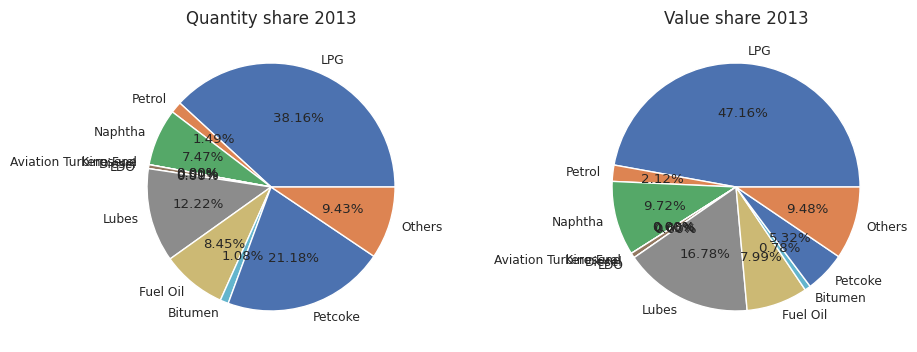

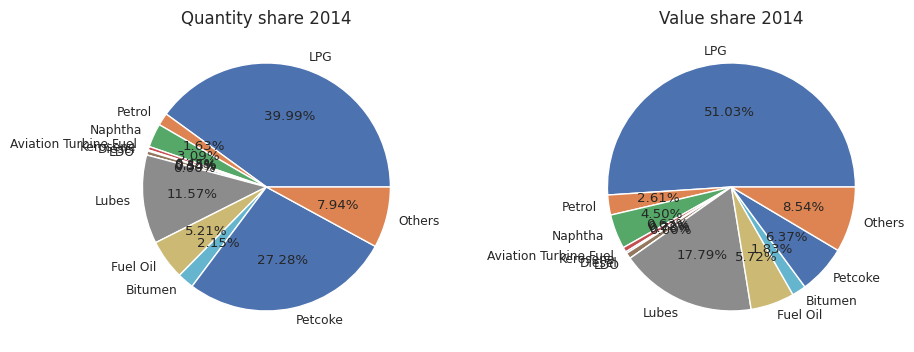

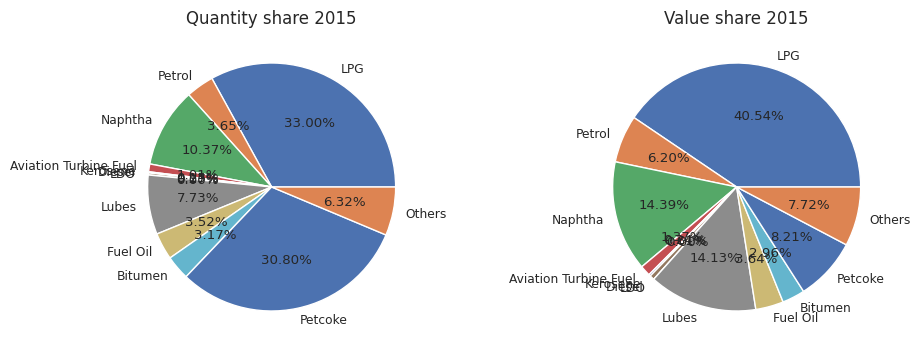

In [44]:
qnt_col = ['2012 - Qty. - TMT', '2013 - Qty. - TMT', '2014 - Qty. - TMT', '2015 - Qty. - TMT', '2016 - Qty. - TMT', '2017 (P) - Qty. - TMT']
value_col = ['2012 - Value - Million USD', '2013 - Value - Million USD', '2014 - Value - Million USD', '2015 - Value - Million USD', '2016 - Value - Million USD', '2017 (P) - Value - Million USD']

for i in range(len(qnt_col)):
    fig = plt.subplots(figsize =(10, 8))
    plt.subplot(1, 2, 1)
    sns.set(font_scale=0.8)
    data = import_df[qnt_col[i]].tolist()
    labels = import_df['Item']

    plt.pie(data, labels=labels, autopct='%1.2f%%')
    plt.title('Quantity share '+str(i+2012), fontsize = 12)

    plt.subplot(1, 2, 2)
    sns.set(font_scale=0.8)
    data = import_df[value_col[i]].tolist()
    labels = import_df['Item']

    plt.pie(data, labels=labels, autopct='%1.2f%%')
    plt.title('Value share '+str(i+2012), fontsize = 12)

    plt.subplots_adjust(wspace=0.5)

    plt.show()

**Pie charts to show percentage share of quantity and value of export for each component of crude oil year-wise**

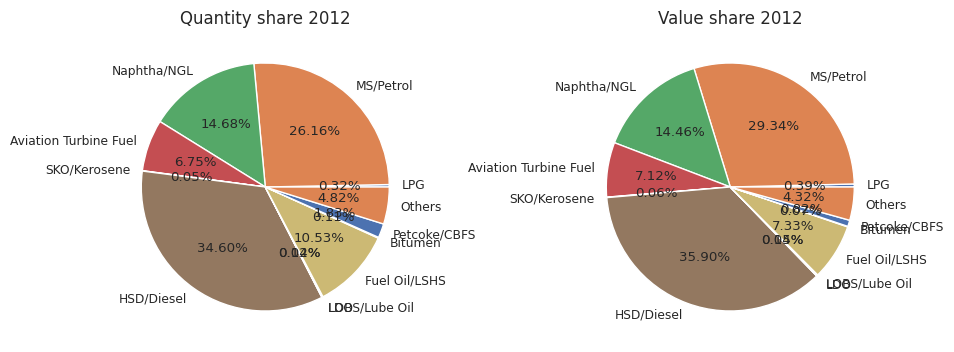

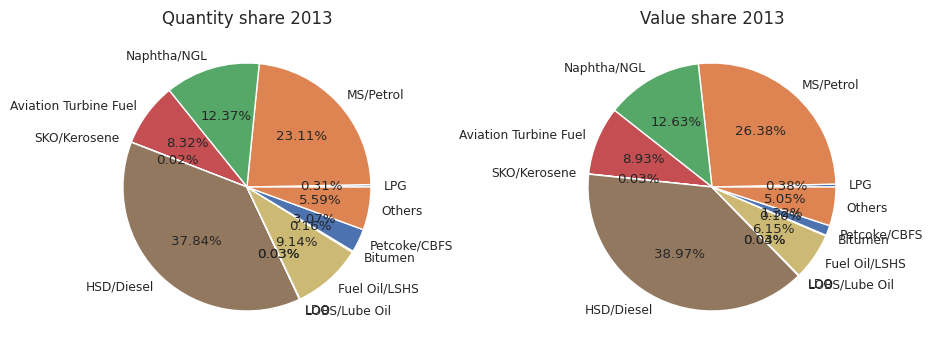

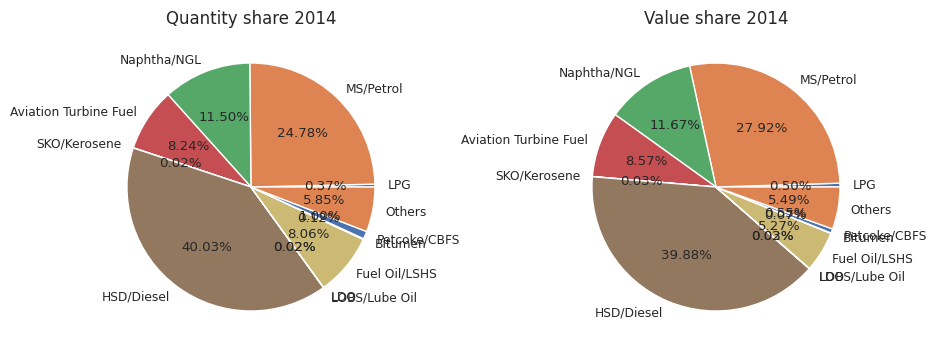

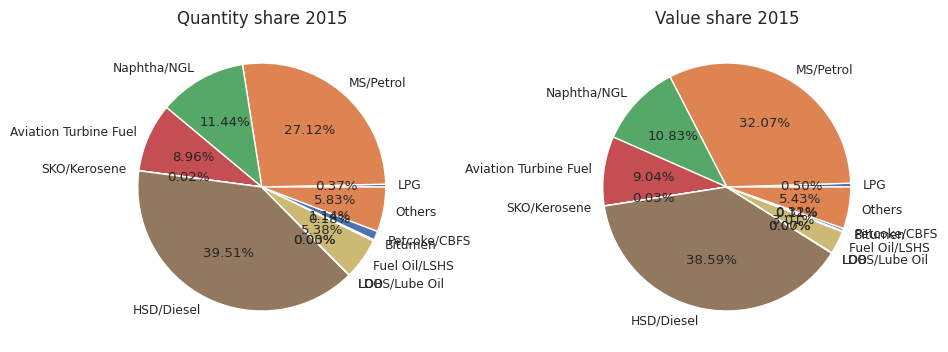

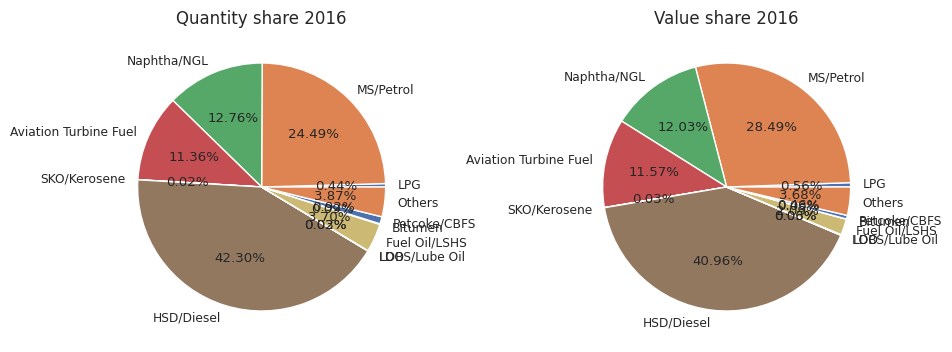

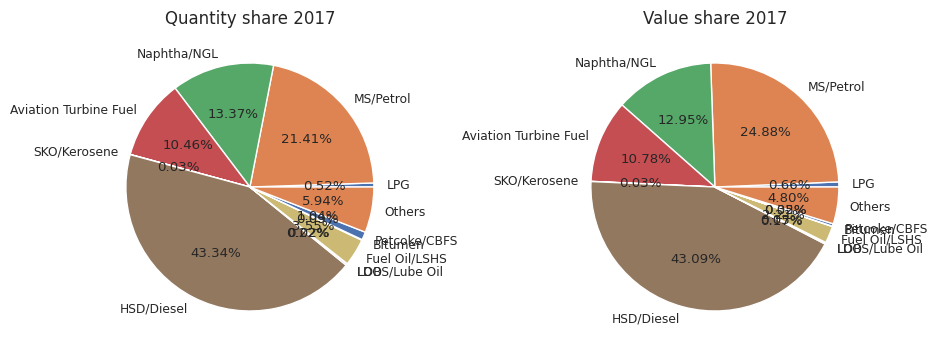

In [45]:
qnt_col = ['2012 - Qty. - TMT', '2013 - Qty. - TMT', '2014 - Qty. - TMT', '2015 - Qty. - TMT', '2016 - Qty. - TMT', '2017 (P) - Qty. - TMT']
value_col = ['2012 - Value - Million USD', '2013 - Value - Million USD', '2014 - Value - Million USD', '2015 - Value - Million USD', '2016 - Value - Million USD', '2017 (P) - Value - Million USD']

for i in range(len(qnt_col)):
    fig = plt.subplots(figsize =(10, 8))
    plt.subplot(1, 2, 1)
    sns.set(font_scale=0.8)
    data = export_df[qnt_col[i]].tolist()
    labels = export_df['Item']

    plt.pie(data, labels=labels, autopct='%1.2f%%')
    plt.title('Quantity share '+str(i+2012), fontsize = 12)

    plt.subplot(1, 2, 2)
    sns.set(font_scale=0.8)
    data = export_df[value_col[i]].tolist()
    labels = export_df['Item']

    plt.pie(data, labels=labels, autopct='%1.2f%%')
    plt.title('Value share '+str(i+2012), fontsize = 12)

    plt.subplots_adjust(wspace=0.5)

    plt.show()

In [46]:
import_cost_df = import_df.drop(['2012 - Qty. - TMT','2013 - Qty. - TMT','2014 - Qty. - TMT','2015 - Qty. - TMT','2016 - Qty. - TMT','2017 (P) - Qty. - TMT'],axis = 1)
import_cost_df.head(5)

Item  2012 - Value - Million USD  \
0                    LPG                        6247   
1                 Petrol                         160   
2                Naphtha                        1809   
3  Aviation Turbine Fuel                           0   
4               Kerosene                           0   

   2013 - Value - Million USD  2014 - Value - Million USD  \
0                        5522                        6774   
1                         248                         346   
2                        1138                         597   
3                           0                          83   
4                           0                          29   

   2015 - Value - Million USD  2016 - Value - Million USD  \
0                        4203                        3870   
1                         643                         274   
2                        1492                        1218   
3                         142                         149   
4                          25                           0   

   2017 (P) - Value - Million USD  
0                            6155  
1                              91  
2                            1002  
3                             158  
4                               0

In [47]:
import_qnt_df = import_df.drop(['2012 - Value - Million USD','2013 - Value - Million USD','2014 - Value - Million USD','2015 - Value - Million USD','2016 - Value - Million USD','2017 (P) - Value - Million USD'],axis=1)
import_qnt_df.head(5)

Item  2012 - Qty. - TMT  2013 - Qty. - TMT  \
0                    LPG               6556               6016   
1                 Petrol                147                235   
2                Naphtha               1861               1177   
3  Aviation Turbine Fuel                  0                  0   
4               Kerosene                  0                  0   

   2014 - Qty. - TMT  2015 - Qty. - TMT  2016 - Qty. - TMT  \
0               8050               8901              10197   
1                328                984                549   
2                623               2797               2926   
3                 90                273                333   
4                 30                 41                  0   

   2017 (P) - Qty. - TMT  
0                  11888  
1                    174  
2                   1879  
3                    273  
4                      0

In [48]:
export_cost_df = export_df.drop(['2012 - Qty. - TMT','2013 - Qty. - TMT','2014 - Qty. - TMT','2015 - Qty. - TMT','2016 - Qty. - TMT','2017 (P) - Qty. - TMT'],axis = 1)
export_cost_df.head(5)

Item  2012 - Value - Million USD  \
0                    LPG                         229   
1              MS/Petrol                       17084   
2            Naphtha/NGL                        8420   
3  Aviation Turbine Fuel                        4149   
4           SKO/Kerosene                          33   

   2013 - Value - Million USD  2014 - Value - Million USD  \
0                         236                         266   
1                       16317                       14994   
2                        7811                        6267   
3                        5524                        4600   
4                          17                          15   

   2015 - Value - Million USD  2016 - Value - Million USD  \
0                         144                         151   
1                        9300                        7625   
2                        3140                        3220   
3                        2621                        3096   
4                           8                           7   

   2017 (P) - Value - Million USD  
0                             218  
1                            8226  
2                            4280  
3                            3564  
4                              10

In [49]:
export_qnt_df = export_df.drop(['2012 - Value - Million USD','2013 - Value - Million USD','2014 - Value - Million USD','2015 - Value - Million USD','2016 - Value - Million USD','2017 (P) - Value - Million USD'],axis=1)
export_qnt_df.head(5)

Item  2012 - Qty. - TMT  2013 - Qty. - TMT  \
0                    LPG                195                213   
1              MS/Petrol              16098              15874   
2            Naphtha/NGL               9035               8496   
3  Aviation Turbine Fuel               4153               5716   
4           SKO/Kerosene                 29                 16   

   2014 - Qty. - TMT  2015 - Qty. - TMT  2016 - Qty. - TMT  \
0                239                217                291   
1              15942              15893              16150   
2               7397               6708               8417   
3               5300               5253               7489   
4                 14                 12                 15   

   2017 (P) - Qty. - TMT  
0                    348  
1                  14262  
2                   8907  
3                   6968  
4                     17

In [50]:
def dataframe_transpose(df):
  df = df.set_index(df.columns[0])
  column = list(df.columns)
  df = df.T
  df = df.reindex(column)
  df.reset_index(inplace = True)
  df.rename(columns = {'index':'Year'}, inplace = True)
  return df

In [51]:
import_cost = dataframe_transpose(import_cost_df)
import_qnt = dataframe_transpose(import_qnt_df)
export_cost = dataframe_transpose(export_cost_df)
export_qnt = dataframe_transpose(export_qnt_df)

In [52]:
import_cost.head(5)

Item                        Year   LPG  Petrol  Naphtha  \
0     2012 - Value - Million USD  6247     160     1809   
1     2013 - Value - Million USD  5522     248     1138   
2     2014 - Value - Million USD  6774     346      597   
3     2015 - Value - Million USD  4203     643     1492   
4     2016 - Value - Million USD  3870     274     1218   

Item  Aviation Turbine Fuel  Kerosene  Diesel  LDO  Lubes  Fuel Oil  Bitumen  \
0                         0         0     766    0   2022       741       50   
1                         0         0      76    0   1965       936       91   
2                        83        29     103    0   2362       759      243   
3                       142        25      63    0   1465       377      307   
4                       149         0     399    0   1270       293      213   

Item  Petcoke  Others  
0         581     886  
1         623    1110  
2         845    1133  
3         851     800  
4        1066     712

In [53]:
import_qnt.head(5)

Item               Year    LPG  Petrol  Naphtha  Aviation Turbine Fuel  \
0     2012 - Qty. - TMT   6556     147     1861                      0   
1     2013 - Qty. - TMT   6016     235     1177                      0   
2     2014 - Qty. - TMT   8050     328      623                     90   
3     2015 - Qty. - TMT   8901     984     2797                    273   
4     2016 - Qty. - TMT  10197     549     2926                    333   

Item  Kerosene  Diesel  LDO  Lubes  Fuel Oil  Bitumen  Petcoke  Others  
0            0     783    0   1885       972      100     3071    1102  
1            0      81    0   1927      1332      171     3339    1487  
2           30     108    0   2329      1049      433     5493    1599  
3           41      72    0   2086       948      856     8307    1705  
4            0     975    0   2257      1150      887    14710    2033

In [54]:
export_cost.head(5)

Item                        Year  LPG  MS/Petrol  Naphtha/NGL  \
0     2012 - Value - Million USD  229      17084         8420   
1     2013 - Value - Million USD  236      16317         7811   
2     2014 - Value - Million USD  266      14994         6267   
3     2015 - Value - Million USD  144       9300         3140   
4     2016 - Value - Million USD  151       7625         3220   

Item  Aviation Turbine Fuel  SKO/Kerosene  HSD/Diesel  LDO  LOBS/Lube Oil  \
0                      4149            33       20908   22             85   
1                      5524            17       24102   16             24   
2                      4600            15       21417   10             18   
3                      2621             8       11189    0             21   
4                      3096             7       10963    8             16   

Item  Fuel Oil/LSHS  Bitumen  Petcoke/CBFS  Others  
0              4271       40           477    2518  
1              3806       61           814    3122  
2              2832       35           298    2950  
3               874       31            93    1575  
4               560        9           124     986

In [55]:
export_qnt.head(5)

Item               Year  LPG  MS/Petrol  Naphtha/NGL  Aviation Turbine Fuel  \
0     2012 - Qty. - TMT  195      16098         9035                   4153   
1     2013 - Qty. - TMT  213      15874         8496                   5716   
2     2014 - Qty. - TMT  239      15942         7397                   5300   
3     2015 - Qty. - TMT  217      15893         6708                   5253   
4     2016 - Qty. - TMT  291      16150         8417                   7489   

Item  SKO/Kerosene  HSD/Diesel  LDO  LOBS/Lube Oil  Fuel Oil/LSHS  Bitumen  \
0               29       21294   26             75           6480       65   
1               16       25997   22             19           6281      108   
2               14       25756   14             12           5187       74   
3               12       23160    0             19           3154      107   
4               15       27892   20             13           2439       57   

Item  Petcoke/CBFS  Others  
0             1129    2969  
1             2111    3842  
2              642    3761  
3              669    3419  
4              608    2551

In [56]:
def plot_linechart(df):
    x = df.iloc[:, 0]
    y = []
    for i in range(1, df.shape[1]):
        y.append(df.iloc[:, i])

    for i in range(1, df.shape[1]):
        plt.plot(x , y[i-1], label = df.columns[i])

    plt.xticks(rotation = 45, fontsize = 10)
    plt.legend()
        

**Line Chart to understand year-wise trend of Import Value and Import Quantity of each component of crude oil**

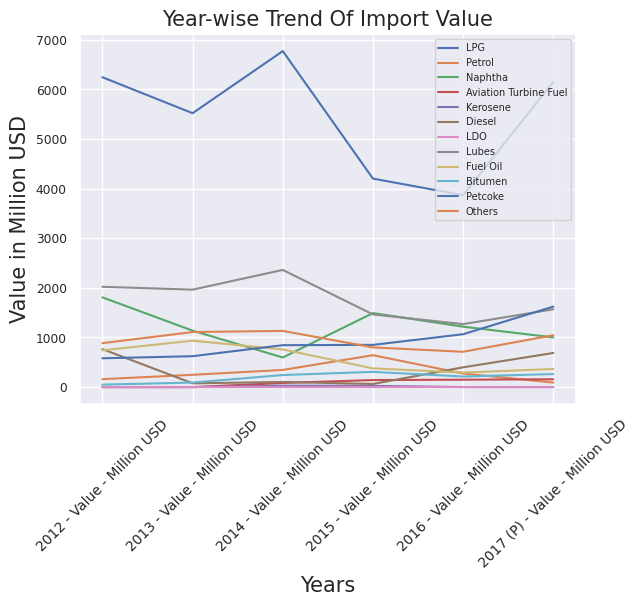

In [57]:
plot_linechart(import_cost)
plt.xlabel("Years", fontsize = 15)
plt.ylabel("Value in Million USD", fontsize = 15)
plt.title("Year-wise Trend Of Import Value", fontsize = 15)
plt.legend(loc='best', fontsize=7)
plt.show()

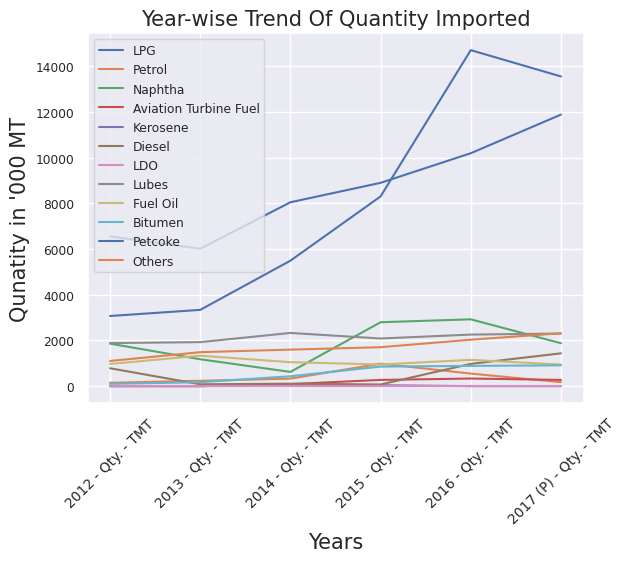

In [58]:
plot_linechart(import_qnt)
plt.xlabel("Years", fontsize = 15)
plt.ylabel("Qunatity in '000 MT", fontsize = 15)
plt.title("Year-wise Trend Of Quantity Imported", fontsize = 15)
plt.show()

**Line Chart to understand year-wise trend of Export Value and Export Quantity of each component of crude oil**

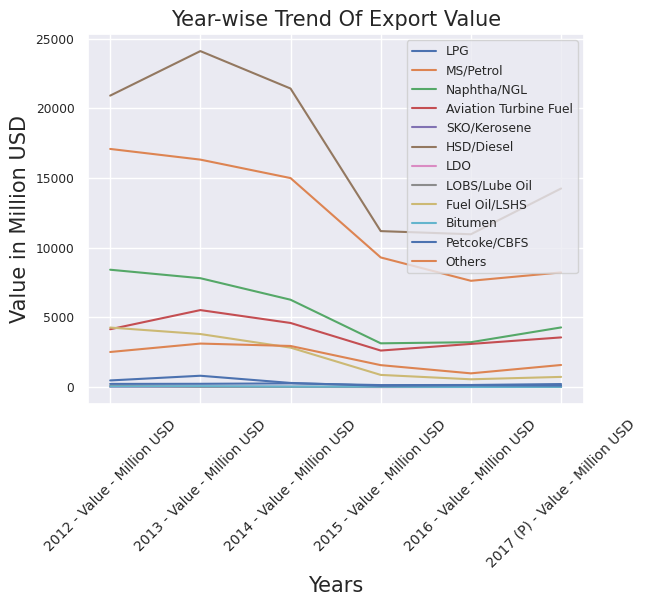

In [59]:
plot_linechart(export_cost)
plt.xlabel("Years", fontsize = 15)
plt.ylabel("Value in Million USD", fontsize = 15)
plt.title("Year-wise Trend Of Export Value", fontsize = 15)
plt.show()

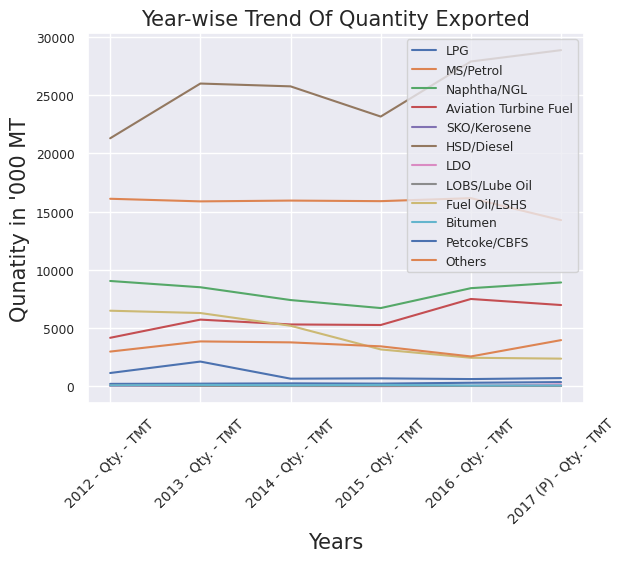

In [60]:
plot_linechart(export_qnt)
plt.xlabel("Years", fontsize = 15)
plt.ylabel("Qunatity in '000 MT", fontsize = 15)
plt.title("Year-wise Trend Of Quantity Exported", fontsize = 15)
plt.show()

**Import vs Export Quantity and Import vs Export Value bar plots side by side for each component of crude oil**

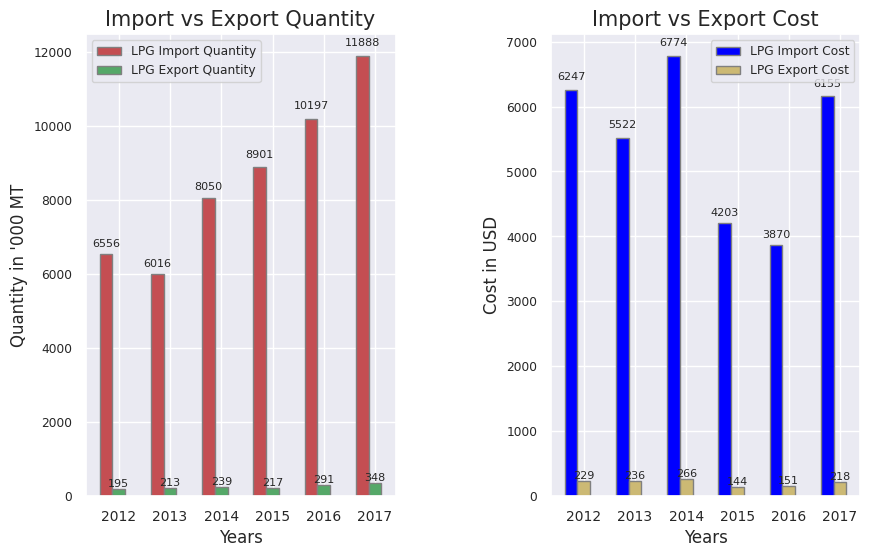

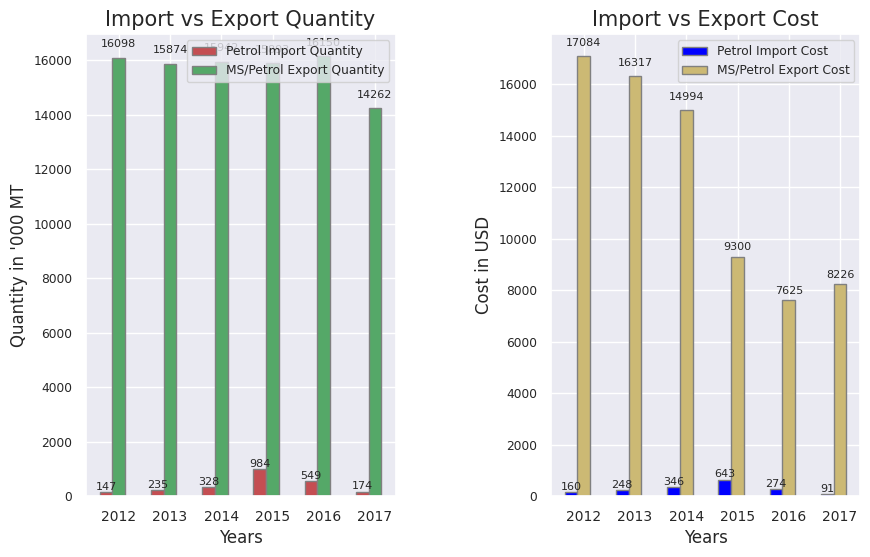

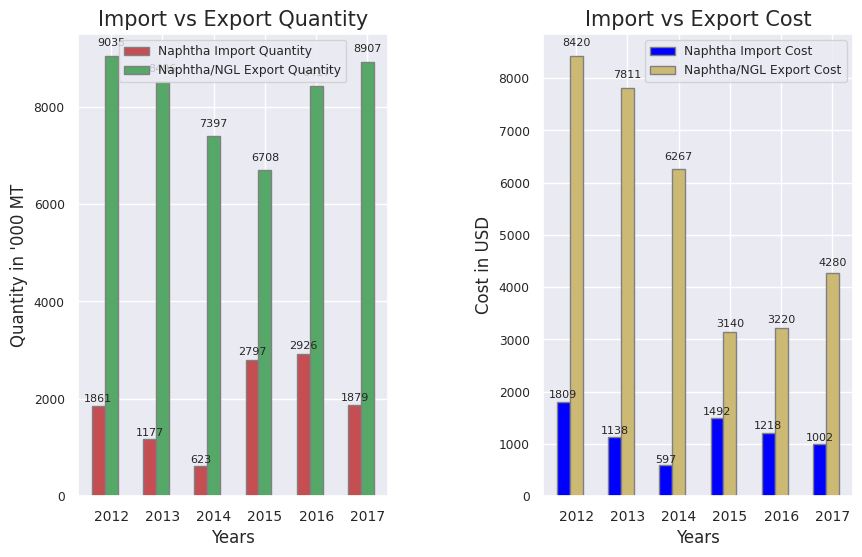

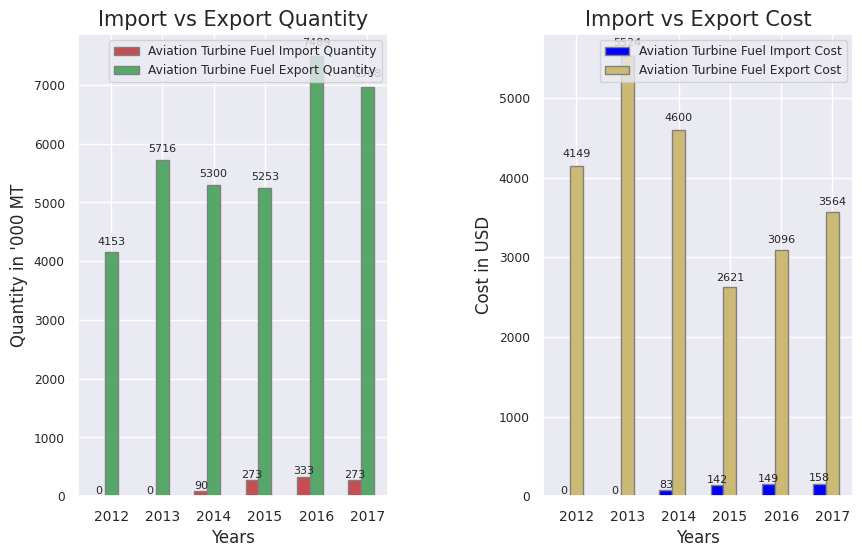

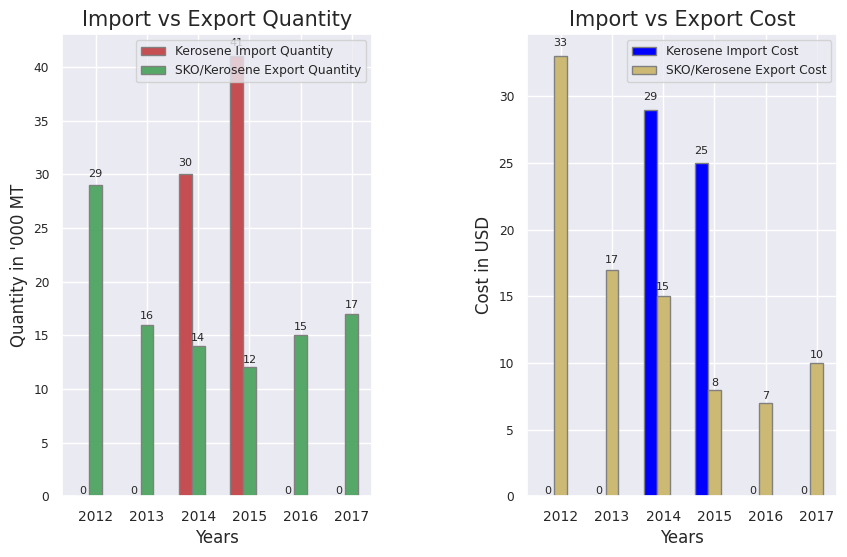

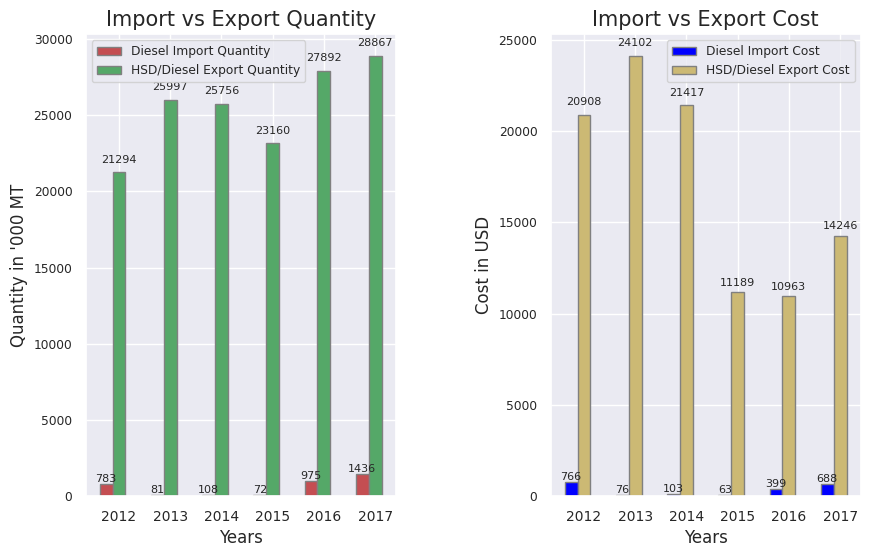

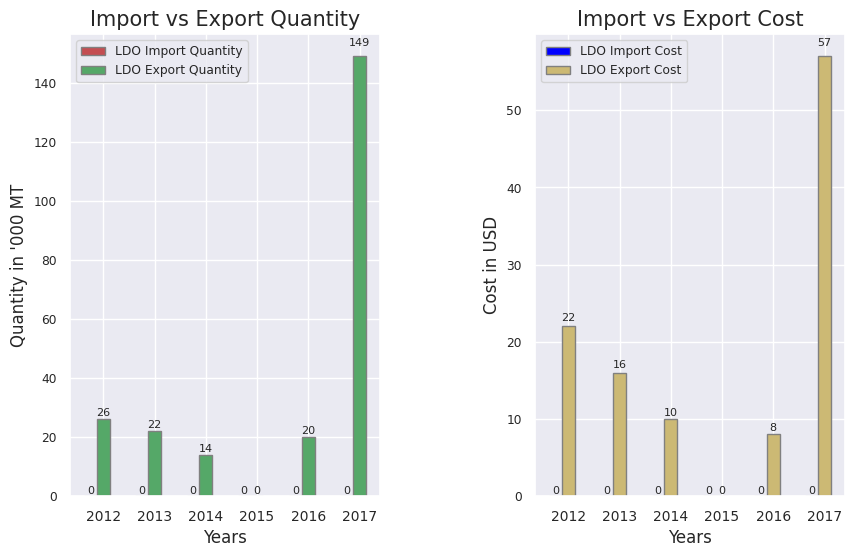

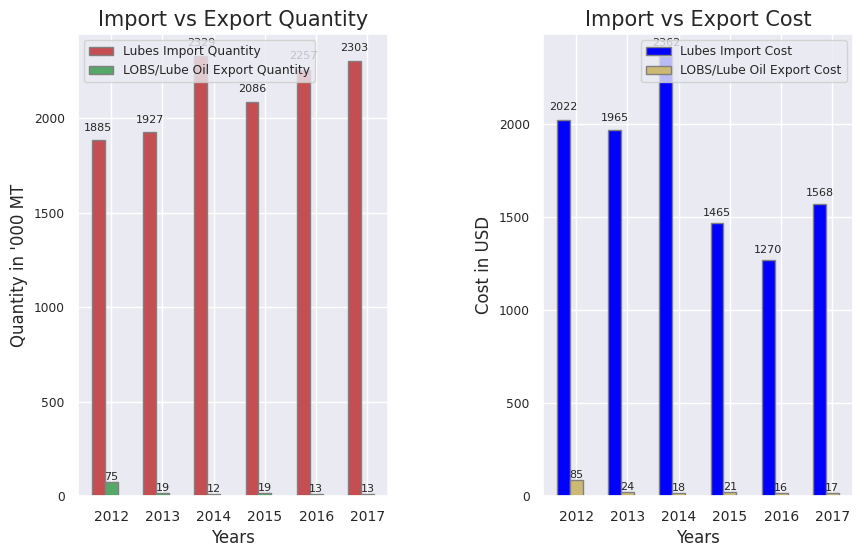

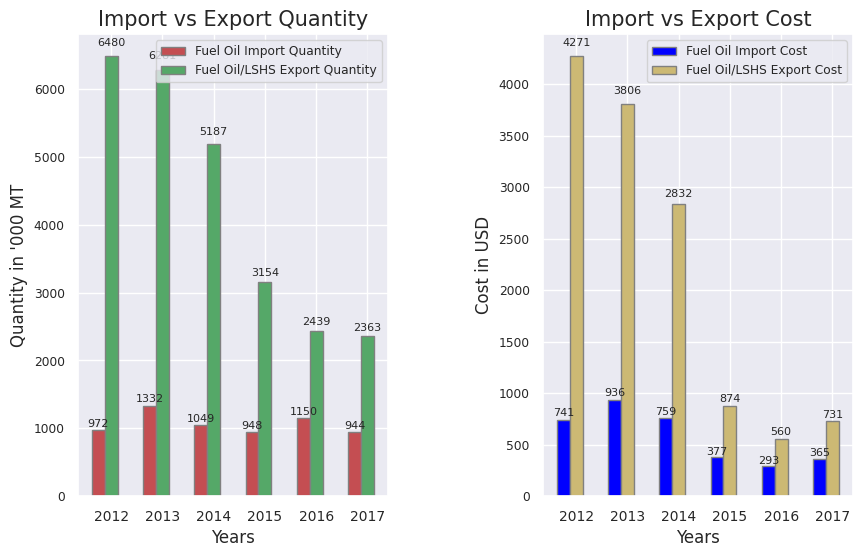

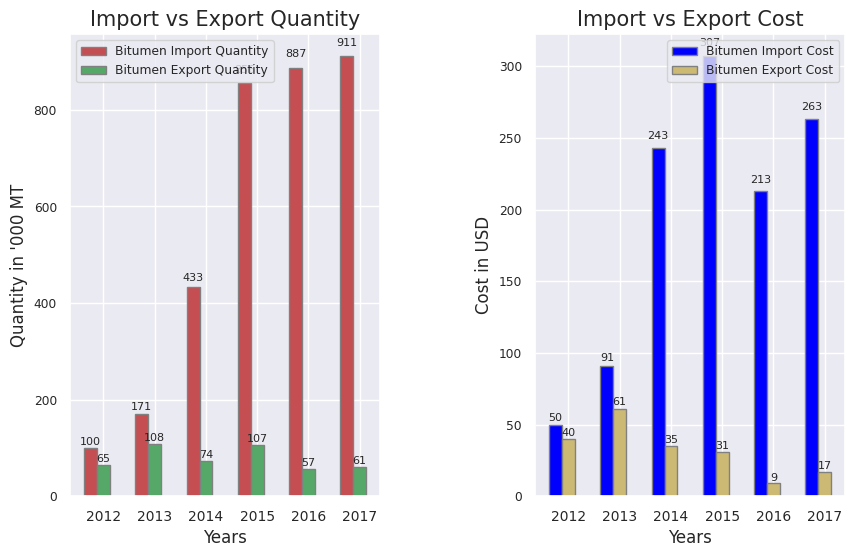

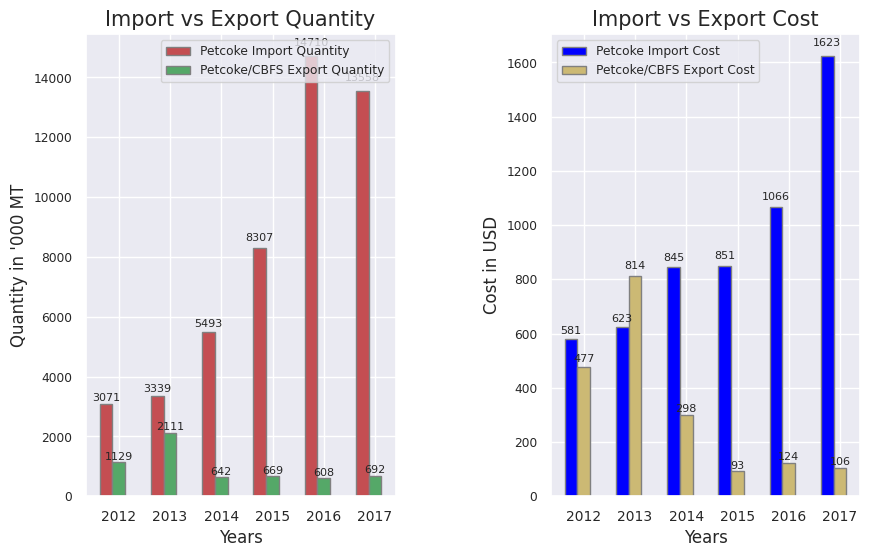

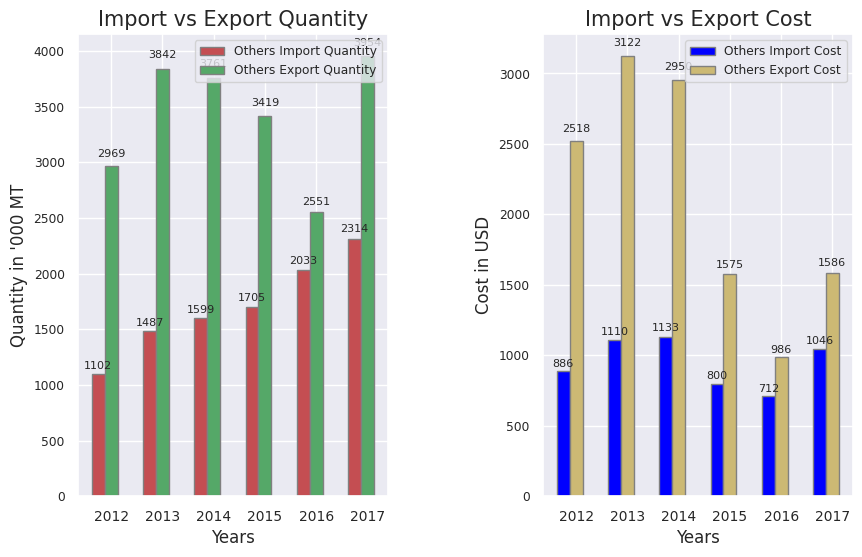

In [61]:

im_cols = ['LPG', 'Petrol', 'Naphtha', 'Aviation Turbine Fuel', 'Kerosene', 'Diesel', 'LDO', 'Lubes', 'Fuel Oil', 'Bitumen', 'Petcoke', 'Others' ]
ex_cols = ['LPG', 'MS/Petrol', 'Naphtha/NGL', 'Aviation Turbine Fuel', 'SKO/Kerosene', 'HSD/Diesel', 'LDO', 'LOBS/Lube Oil', 'Fuel Oil/LSHS', 'Bitumen', 'Petcoke/CBFS', 'Others' ]

for j in range(0, len(im_cols)):
  barWidth = 0.25
  fig = plt.subplots(figsize =(10, 6))

  #bar plot 1
  y1= import_qnt[im_cols[j]]
  y2= export_qnt[ex_cols[j]]
  
  br1 = np.arange(len(y1))
  br2 = [x + barWidth for x in br1]

  plt.subplot(1, 2, 1)
  plt.bar(br1, y1, color ='r', width = barWidth, edgecolor ='grey', label = im_cols[j]+' Import Quantity')
  plt.bar(br2, y2, color ='g', width = barWidth, edgecolor ='grey', label = ex_cols[j]+' Export Quantity')

  for i, rect in enumerate(plt.gca().patches):
      height = rect.get_height()
      plt.gca().text(rect.get_x() + rect.get_width()/2., 1.02*height,
                    f'{height:.0f}',
                    ha='center', va='bottom', rotation=0, fontsize=8)

  plt.xticks([r + barWidth for r in range(len(y1))],
          ['2012', '2013', '2014', '2015', '2016', '2017'], fontsize=10)
  
  plt.xlabel("Years", fontsize=12)
  plt.ylabel("Quantity in '000 MT", fontsize=12)
  plt.title("Import vs Export Quantity", fontsize=15)

  plt.legend()

  #bar plot 2
  y3= import_cost[im_cols[j]]
  y4= export_cost[ex_cols[j]]

  br1 = np.arange(len(y3))
  br2 = [x + barWidth for x in br1]

  plt.subplot(1, 2, 2)
  plt.bar(br1, y3, color ='blue', width = barWidth, edgecolor ='grey', label = im_cols[j]+' Import Cost')
  plt.bar(br2, y4, color ='y', width = barWidth, edgecolor ='grey', label = ex_cols[j]+' Export Cost')

  for i, rect in enumerate(plt.gca().patches):
      height = rect.get_height()
      plt.gca().text(rect.get_x() + rect.get_width()/2., 1.02*height,
                    f'{height:.0f}',
                    ha='center', va='bottom', rotation=0, fontsize=8)

  plt.xticks([r + barWidth for r in range(len(y3))],
          ['2012', '2013', '2014', '2015', '2016', '2017'], fontsize=10)
  
  plt.xlabel("Years", fontsize=12)
  plt.ylabel("Cost in USD", fontsize=12)
  plt.title("Import vs Export Cost", fontsize=15)

  plt.legend()

  plt.subplots_adjust(wspace=0.5)

  plt.show()
  print()
  print()

**Total Import, Total Export and Net Import**

In [62]:
print("Total Import by India each year in terms of value and quantity is: ")
crude_df.iloc[14:15, 1:]

Total Import by India each year in terms of value and quantity is: 


2012 - Qty. - TMT  2012 - Value - Million USD  2013 - Qty. - TMT  \
14             200649                      160144             205116   

    2013 - Value - Million USD  2014 - Qty. - TMT  2014 - Value - Million USD  \
14                      156067             208903                      144272   

    2015 - Qty. - TMT  2015 - Value - Million USD  2016 - Qty. - TMT  \
14             223461                       80026             251392   

    2016 - Value - Million USD  2017 (P) - Qty. - TMT  \
14                       71354                 252126   

    2017 (P) - Value - Million USD  
14                           94297

In [63]:
print("Total Export by India each year in terms of value and quantity is: ")
crude_df.iloc[27:28, 1:]

Total Export by India each year in terms of value and quantity is: 


2012 - Qty. - TMT  2012 - Value - Million USD  2013 - Qty. - TMT  \
27              61548                       58236              68696   

    2013 - Value - Million USD  2014 - Qty. - TMT  2014 - Value - Million USD  \
27                       61851              64337                       53703   

    2015 - Qty. - TMT  2015 - Value - Million USD  2016 - Qty. - TMT  \
27              58611                       28995              65942   

    2016 - Value - Million USD  2017 (P) - Qty. - TMT  \
27                       26765                  66601   

    2017 (P) - Value - Million USD  
27                           33059

In [64]:
print("Net Import by India each year in terms of value and quantity is: ")
crude_df.iloc[28:29, 1:]

Net Import by India each year in terms of value and quantity is: 


2012 - Qty. - TMT  2012 - Value - Million USD  2013 - Qty. - TMT  \
28             139102                      101908             136419   

    2013 - Value - Million USD  2014 - Qty. - TMT  2014 - Value - Million USD  \
28                       94216             144566                       90569   

    2015 - Qty. - TMT  2015 - Value - Million USD  2016 - Qty. - TMT  \
28             164850                       51031             185451   

    2016 - Value - Million USD  2017 (P) - Qty. - TMT  \
28                       44589                 185525   

    2017 (P) - Value - Million USD  
28                           61239

**Prediction of perunit value of different components of crude oil for last year**

In [65]:
# Making a new dataframe with the name perunit_import_df with contains perunit value of each imported component of crude oil
# Perunit value is calculated as Total Value/ Total Quantity

data = { 'Index': import_df['Item'],
         '2012': import_df['2012 - Value - Million USD'] / import_df['2012 - Qty. - TMT'],
         '2013': import_df['2013 - Value - Million USD'] / import_df['2013 - Qty. - TMT'],
         '2014': import_df['2014 - Value - Million USD'] / import_df['2014 - Qty. - TMT'],
         '2015': import_df['2015 - Value - Million USD'] / import_df['2015 - Qty. - TMT'],
         '2016': import_df['2016 - Value - Million USD'] / import_df['2016 - Qty. - TMT'],
         '2017': import_df['2017 (P) - Value - Million USD'] / import_df['2017 (P) - Qty. - TMT']}

perunit_import_df = pd.DataFrame(data)

perunit_import_df = perunit_import_df.fillna(0)

# Transposing the dataframe to get year-wise data
perunit_import_df = dataframe_transpose(perunit_import_df)

In [66]:
perunit_import_df

Index  Year       LPG    Petrol   Naphtha  Aviation Turbine Fuel  Kerosene  \
0      2012  0.952868  1.088435  0.972058               0.000000  0.000000   
1      2013  0.917886  1.055319  0.966865               0.000000  0.000000   
2      2014  0.841491  1.054878  0.958266               0.922222  0.966667   
3      2015  0.472194  0.653455  0.533429               0.520147  0.609756   
4      2016  0.379523  0.499089  0.416268               0.447447  0.000000   
5      2017  0.517749  0.522989  0.533262               0.578755  0.000000   

Index    Diesel  LDO     Lubes  Fuel Oil   Bitumen   Petcoke    Others  
0      0.978289  0.0  1.072679  0.762346  0.500000  0.189189  0.803993  
1      0.938272  0.0  1.019720  0.702703  0.532164  0.186583  0.746469  
2      0.953704  0.0  1.014169  0.723546  0.561201  0.153832  0.708568  
3      0.875000  0.0  0.702301  0.397679  0.358645  0.102444  0.469208  
4      0.409231  0.0  0.562694  0.254783  0.240135  0.072468  0.350221  
5      0.479109  0.0  0.680851  0.386653  0.288694  0.119708  0.452031

In [67]:
# Making a new dataframe with the name perunit_export_df with contains perunit value of each exported component of crude oil
# Perunit value is calculated as Total Value/ Total Quantity

data = { 'Index': export_df['Item'],
         '2012': export_df['2012 - Value - Million USD'] / export_df['2012 - Qty. - TMT'],
         '2013': export_df['2013 - Value - Million USD'] / export_df['2013 - Qty. - TMT'],
         '2014': export_df['2014 - Value - Million USD'] / export_df['2014 - Qty. - TMT'],
         '2015': export_df['2015 - Value - Million USD'] / export_df['2015 - Qty. - TMT'],
         '2016': export_df['2016 - Value - Million USD'] / export_df['2016 - Qty. - TMT'],
         '2017': export_df['2017 (P) - Value - Million USD'] / export_df['2017 (P) - Qty. - TMT']}

perunit_export_df = pd.DataFrame(data)

perunit_export_df = perunit_export_df.fillna(0)

# Transposing the dataframe to get year-wise data
perunit_export_df = dataframe_transpose(perunit_export_df)

In [68]:
perunit_export_df

Index  Year       LPG  MS/Petrol  Naphtha/NGL  Aviation Turbine Fuel  \
0      2012  1.174359   1.061250     0.931931               0.999037   
1      2013  1.107981   1.027907     0.919374               0.966410   
2      2014  1.112971   0.940534     0.847235               0.867925   
3      2015  0.663594   0.585163     0.468098               0.498953   
4      2016  0.518900   0.472136     0.382559               0.413406   
5      2017  0.626437   0.576777     0.480521               0.511481   

Index  SKO/Kerosene  HSD/Diesel       LDO  LOBS/Lube Oil  Fuel Oil/LSHS  \
0          1.137931    0.981873  0.846154       1.133333       0.659105   
1          1.062500    0.927107  0.727273       1.263158       0.605954   
2          1.071429    0.831534  0.714286       1.500000       0.545980   
3          0.666667    0.483117  0.000000       1.105263       0.277108   
4          0.466667    0.393052  0.400000       1.230769       0.229602   
5          0.588235    0.493505  0.382550       1.307692       0.309353   

Index   Bitumen  Petcoke/CBFS    Others  
0      0.615385      0.422498  0.848097  
1      0.564815      0.385599  0.812598  
2      0.472973      0.464174  0.784366  
3      0.289720      0.139013  0.460661  
4      0.157895      0.203947  0.386515  
5      0.278689      0.153179  0.401113

In [69]:
# Spliting the data into training data with values from year 2012 to 2016 and testing data with values from year 2017
# Here we are predicting the values for next year that is 2017 based on the data of previous 5 years 

def linear_regression(df):
    train_df, test_df = df.iloc[:5,:], df.iloc[5:,:]
    prediction_list = []
    lr = LinearRegression()

    for col in df.columns[1:]:
        
        xtrain = train_df[['Year']]
        ytrain = train_df[[col]]
        xtest = test_df[['Year']]

        lr.fit(xtrain, ytrain)
        y_pred = lr.predict(xtest)

        prediction_list.append(y_pred)

    print('\nPredicted per unit value for next year:')
    for i in range(1, df.shape[1]):
        print(df.columns[i],':', round(prediction_list[i-1][0][0], 3))

    print()
    j = 0
    
    # Calculating the rmse between are predicted values for year 2017 and actual values of year 2017
    for col in test_df.columns[1:]:
        rmse = mse(test_df[[col]], prediction_list[j][0], squared=False)
        print('Rmse for',test_df.columns[j+1],':', round(rmse, 3))
        j += 1



**Final Result**

In [70]:
print("Prediction on Import Data")
linear_regression(perunit_import_df)

Prediction on Import Data

Predicted per unit value for next year:
LPG : 0.235
Petrol : 0.396
Naphtha : 0.306
Aviation Turbine Fuel : 0.802
Kerosene : 0.498
Diesel : 0.47
LDO : 0.0
Lubes : 0.473
Fuel Oil : 0.172
Bitumen : 0.23
Petcoke : 0.046
Others : 0.26

Rmse for LPG : 0.283
Rmse for Petrol : 0.127
Rmse for Naphtha : 0.227
Rmse for Aviation Turbine Fuel : 0.224
Rmse for Kerosene : 0.498
Rmse for Diesel : 0.009
Rmse for LDO : 0.0
Rmse for Lubes : 0.208
Rmse for Fuel Oil : 0.214
Rmse for Bitumen : 0.058
Rmse for Petcoke : 0.074
Rmse for Others : 0.192


In [71]:
print("Prediction on Export Data")
linear_regression(perunit_export_df)

Prediction on Export Data

Predicted per unit value for next year:
LPG : 0.389
MS/Petrol : 0.331
Naphtha/NGL : 0.245
Aviation Turbine Fuel : 0.258
SKO/Kerosene : 0.36
HSD/Diesel : 0.237
LDO : 0.052
LOBS/Lube Oil : 1.258
Fuel Oil/LSHS : 0.107
Bitumen : 0.063
Petcoke/CBFS : 0.118
Others : 0.276

Rmse for LPG : 0.237
Rmse for MS/Petrol : 0.246
Rmse for Naphtha/NGL : 0.236
Rmse for Aviation Turbine Fuel : 0.254
Rmse for SKO/Kerosene : 0.229
Rmse for HSD/Diesel : 0.257
Rmse for LDO : 0.331
Rmse for LOBS/Lube Oil : 0.05
Rmse for Fuel Oil/LSHS : 0.202
Rmse for Bitumen : 0.216
Rmse for Petcoke/CBFS : 0.035
Rmse for Others : 0.125
